# STAGE 1


## Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import os

from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
pd.options.mode.chained_assignment = None
from matplotlib.ticker import FuncFormatter

from sklearn.feature_selection import SelectKBest, f_classif, chi2
from imblearn import under_sampling, over_sampling
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_auc_score


### Load Dataset

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
#os.chdir("drive/MyDrive/Travel Dataset")

In [4]:
finpro = pd.read_csv("Travel.csv")
finpro

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


### **1. Descriptive Statistics**

   Gunakan function info dan describe pada dataset final project kalian. Tuliskan hasil observasinya, seperti:

   A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai?

   B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?

   C. Apakah ada kolom yang memiliki nilai summary agak aneh? (min/mean/median/max/unique/top/freq)

* Untuk masing-masing jenis observasi, tuliskan juga jika tidak ada masalah, misal untuk A: “Semua tipe data sudah sesuai”

In [5]:
finpro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

Berdasarkan informasi yang diberikan dengan menggunakan info, perlu diketahui tipe-tipe kolom dan apa yang dimaksud pada kolom tersebut.

● `CustomerID` : Nomor Unik Masing-Masing Customer

● `ProdTaken` : Apakah Customer Pernah Mengambil Package yang Ditawarkan

● `Age` : Umur

● `TypeofContact` : Bagaimana Cara Agent Menghubungi Customer

● `CityTier` : Level Kota

● `DurationOfPitch` : Lamanya Pitching Terhadap Customer

● `Occupation` : Pekerjaan

● `Gender` : Jenis Kelamin

● `NumberOfPersonVisiting` : Berapa Banyak Anggota Keluarga yang Ingin Dibawa

● `NumberOfFollowups` : Berapa Banyak Follow Up Yang Dilakukan Terhadap Customer

● `ProductPitched` : Jenis Produk yang Ditawarkan

● `PreferredPropertyStar` : Rating Properti yang Diinginkan Customer

● `MaritalStatus` : Status

● `NumberofTrips` : Banyaknya Perjalanan yang Dilakukan Customer

● `Passport` : Paspor

● `PitchSatisfactionScore` : Nilai Kepuasan Customer Pada Pitching

● `OwnCar` : Mempunyai Kendaraan

● `NumberOfChildrenVisiting` : Banyaknya Anak Kecil yang Akan Pergi

● `Designation` : Designasi Customer

● `MonthlyIncome` : Pendapatan per Bulan

#### Beberapa insight yang dapat didapatkan dengan menggunakan command **Info** adalah:



- Ada 8 kolom yang memiliki nilai yang kosong yaitu `Age`, `TypeofContact`, `DurationOfPitch`, `NumberOfFollowups`, `PreferredPropertyStar`, `NumberOfTrips`, `NumberOfChildrenVisiting` dan `MonthlyIncome`, sedangkan untuk tipe data nama kolom dengan isi kolom sudah sesuai.

- Bila melihat berdasarkan `Info`, dapat diinformasikan bahwa terdapat beberapa kolom yang mempunyai nilai kosong. Hal ini didukung dengan jumlah baris pada beberapa kolom yang tidak sesuai dengan total jumlah baris pada dataset. Adapun nama-nama kolom yang mempunyai nilai kosong adalah `Age`, `TypeofContact`, `DurationOfPitch`, `NumberOfFollowups`, `PreferredPropertyStar`, `NumberofTrips`, `NumberOfChildrenVisiting` dan `MonthlyIncome`.

In [6]:
finpro.sample(5)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
852,200852,0,29.0,Self Enquiry,1,12.0,Small Business,Female,2,3.0,Basic,3.0,Divorced,2.0,0,3,0,0.0,Executive,18131.0
3871,203871,0,41.0,Self Enquiry,1,7.0,Salaried,Male,3,4.0,Basic,3.0,Married,2.0,0,1,0,1.0,Executive,21084.0
656,200656,1,32.0,Self Enquiry,1,31.0,Salaried,Male,2,3.0,Basic,3.0,Single,2.0,1,5,1,0.0,Executive,17795.0
4609,204609,1,38.0,Self Enquiry,3,7.0,Salaried,Male,3,5.0,Standard,3.0,Married,7.0,0,1,1,2.0,Senior Manager,29287.0
1694,201694,0,31.0,NaN,1,NaN,Small Business,Male,2,5.0,Deluxe,3.0,Married,1.0,0,3,0,0.0,Manager,NaN


In [7]:
#Memisahkan tipe data numericals dan catagericals

numericals = ['Age', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'NumberOfTrips', 'PitchSatisfactionScore', 'NumberOfChildrenVisiting', 'MonthlyIncome']
categoricals = ['ProdTaken', 'TypeofContact', 'CityTier', 'Occupation', 'Gender', 'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus', 'Passport', 'Designation']

In [8]:
finpro[numericals].describe()

,Age,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,NumberOfTrips,PitchSatisfactionScore,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4888.000000,4843.000000,4748.000000,4888.000000,4822.000000,4655.000000
mean,37.622265,15.490835,2.905074,3.708445,3.236521,3.078151,1.187267,23619.853491
std,9.316387,8.519643,0.724891,1.002509,1.849019,1.365792,0.857861,5380.698361
min,18.000000,5.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,2.000000,3.000000,2.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,3.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,3.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,5.000000,6.000000,22.000000,5.000000,3.000000,98678.000000


In [9]:
finpro[categoricals].describe()

,ProdTaken,CityTier,PreferredPropertyStar,Passport
count,4888.000000,4888.000000,4862.000000,4888.000000
mean,0.188216,1.654255,3.581037,0.290917
std,0.390925,0.916583,0.798009,0.454232
min,0.000000,1.000000,3.000000,0.000000
25%,0.000000,1.000000,3.000000,0.000000
50%,0.000000,1.000000,3.000000,0.000000
75%,0.000000,3.000000,4.000000,1.000000
max,1.000000,3.000000,5.000000,1.000000


In [10]:
for col in categoricals:
    print(f'''Value count kolom {col}:''')
    print(finpro[col].value_counts())
    print()

Value count kolom ProdTaken:
0    3968
1     920
Name: ProdTaken, dtype: int64

Value count kolom TypeofContact:
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64

Value count kolom CityTier:
1    3190
3    1500
2     198
Name: CityTier, dtype: int64

Value count kolom Occupation:
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64

Value count kolom Gender:
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

Value count kolom ProductPitched:
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64

Value count kolom PreferredPropertyStar:
3.0    2993
5.0     956
4.0     913
Name: PreferredPropertyStar, dtype: int64

Value count kolom MaritalStatus:
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64

Value count kolom Passpor

#### Beberapa insight yang dapat didapatkan dengan menggunakan command **Describe** adalah:

- Untuk kolom `ProdTaken`, `CityTier`, `Passport`, `PreferredPropertyStar`, dan `OwnCar` tipe data dirubah kedalam bentuk `boolean` atau `category` karena kolom tersebut berisi value yang termasuk kategorikal.

- Terkait data numerikal, dapat terlihat bahwa kolom `DurationOfPitch`, `NumberOfTrips` dan `MonthlyIncome` mempunyai outlier yang cukup besar sehingga akan mempengaruhi secara signfikan sebaran data pada kolom tersebut, dan hanya kolom `Age` yang mungkin akan mempunyai sebaran data yang cukup normal.

- Sebelumnya ada 3 value pada kolom 'Gender' yaitu Male, Female dan Fe Male. Kolom `'Gender'` kita extraction menjadi 2 value yaitu Male dan Female.

- Pada kolom `'MaritalStatus'` terdapat 4 value yaitu, Single, Married, Divorce dan Unmarried. Untuk value Divorce dan Unmarried kita extraction menjadi Single, karena Divorce dan Unmarried tidak memiliki pasangan jadi kita masukan kedalam kategori Single.

- Pada kolom `'ProductPitched'` terdapat 5 value yaitu Basic, Standard, Deluxe, Super Deluxe dan King. Untuk value 'Standard', kita jadikan kedalam ProductPitched Basic.
- Pada kolom `'Occupation'` terdapat 5 value, yaitu Salaried, Small Business, Large Business dan Free Lancer. Untuk value Free Lancer, kita jadikan kedalam Small Business, karena Free Lancer value count memiliki jumlah yang sangat sedikit.

In [11]:
finpro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

#### Memisahkan tipe data numericals dan categoricals

In [12]:
#Memisahkankan kembali tipe data numericals dan catagericals

numericals = ['Age', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'NumberOfTrips', 'PitchSatisfactionScore', 'NumberOfChildrenVisiting', 'MonthlyIncome']
categoricals = ['ProdTaken', 'TypeofContact', 'CityTier', 'Occupation', 'Gender', 'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus', 'Passport', 'Designation']

In [13]:
finpro[numericals].describe()

,Age,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,NumberOfTrips,PitchSatisfactionScore,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4888.000000,4843.000000,4748.000000,4888.000000,4822.000000,4655.000000
mean,37.622265,15.490835,2.905074,3.708445,3.236521,3.078151,1.187267,23619.853491
std,9.316387,8.519643,0.724891,1.002509,1.849019,1.365792,0.857861,5380.698361
min,18.000000,5.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,2.000000,3.000000,2.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,3.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,3.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,5.000000,6.000000,22.000000,5.000000,3.000000,98678.000000


In [14]:
for col in categoricals:
    print(f'''Value count kolom {col}:''')
    print(finpro[col].value_counts())
    print('------------------------------------------')

Value count kolom ProdTaken:
0    3968
1     920
Name: ProdTaken, dtype: int64
------------------------------------------
Value count kolom TypeofContact:
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
------------------------------------------
Value count kolom CityTier:
1    3190
3    1500
2     198
Name: CityTier, dtype: int64
------------------------------------------
Value count kolom Occupation:
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
------------------------------------------
Value count kolom Gender:
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
------------------------------------------
Value count kolom ProductPitched:
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
------------------------------------------
Value count kolom PreferredProper

In [15]:
#Merubah nama nilai pada kolom Gender, MaritalStatus, ProductPitched dan Occupation

finpro['Gender'] = finpro['Gender'].replace(['Fe Male'], 'Female')
finpro['MaritalStatus'] = finpro['MaritalStatus'].replace(['Divorced','Unmarried'],'Single')
finpro['ProductPitched'] = finpro['ProductPitched'].replace(['Standard'],'Basic')
finpro['Occupation'] = finpro['Occupation'].replace(['Free Lancer'],'Small Business')

In [16]:
for col in categoricals:
    print(f'''Value count kolom {col}:''')
    print(finpro[col].value_counts())
    print('------------------------------------------')

Value count kolom ProdTaken:
0    3968
1     920
Name: ProdTaken, dtype: int64
------------------------------------------
Value count kolom TypeofContact:
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
------------------------------------------
Value count kolom CityTier:
1    3190
3    1500
2     198
Name: CityTier, dtype: int64
------------------------------------------
Value count kolom Occupation:
Salaried          2368
Small Business    2086
Large Business     434
Name: Occupation, dtype: int64
------------------------------------------
Value count kolom Gender:
Male      2916
Female    1972
Name: Gender, dtype: int64
------------------------------------------
Value count kolom ProductPitched:
Basic           2584
Deluxe          1732
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
------------------------------------------
Value count kolom PreferredPropertyStar:
3.0    2993
5.0     956
4.0     913
Name: PreferredPro

## **2. Univariate Analysis**

   Gunakan visualisasi untuk melihat distribusi masing-masing kolom (feature maupun target). Tuliskan hasil observasinya, misalnya jika ada suatu kolom yang distribusinya menarik (misal skewed, bimodal, ada outlier, ada nilai yang mendominasi, kategorinya terlalu banyak, dsb). Jelaskan juga apa yang harus di-follow up saat data pre-processing.

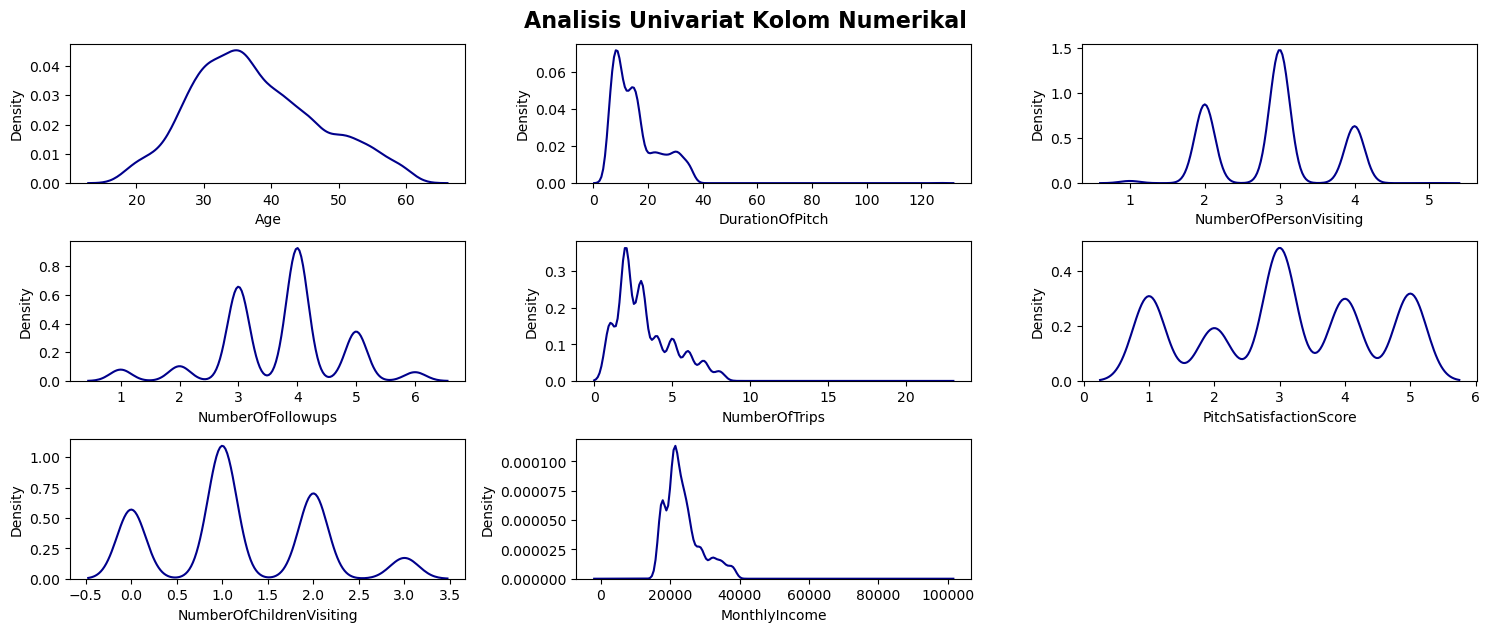

In [17]:
#Individual displot (Numerikals)

plt.figure(figsize=(15, 10))
plt.suptitle('Analisis Univariat Kolom Numerikal', fontsize=16, fontweight='bold')
for i in range(0, len(numericals)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(finpro[numericals[i]], color='darkblue')
    plt.xlabel(numericals[i])
    plt.tight_layout()

Berdasarkan hasil analisis univariat terhadap kolom numerikal, dapat ditarik beberapa insight seperti:

● Kolom `DurationOfPitch`, `NumberOfTrips` dan `MonthlyIncome` memilik distribusi data secara **positive skewed**, yang menandakan bahwa pada data tersebut terdapat data outlier dan juga nilai **mean** yang lebih besar dari nilai **median**.

● Kolom `Age` mempunyai distribusi yang hampir normal

● Kolom `CustomerID` mempunyai distribusi yang sangat luas dikarenakan terdapat nilai unik untuk masing-masing data.

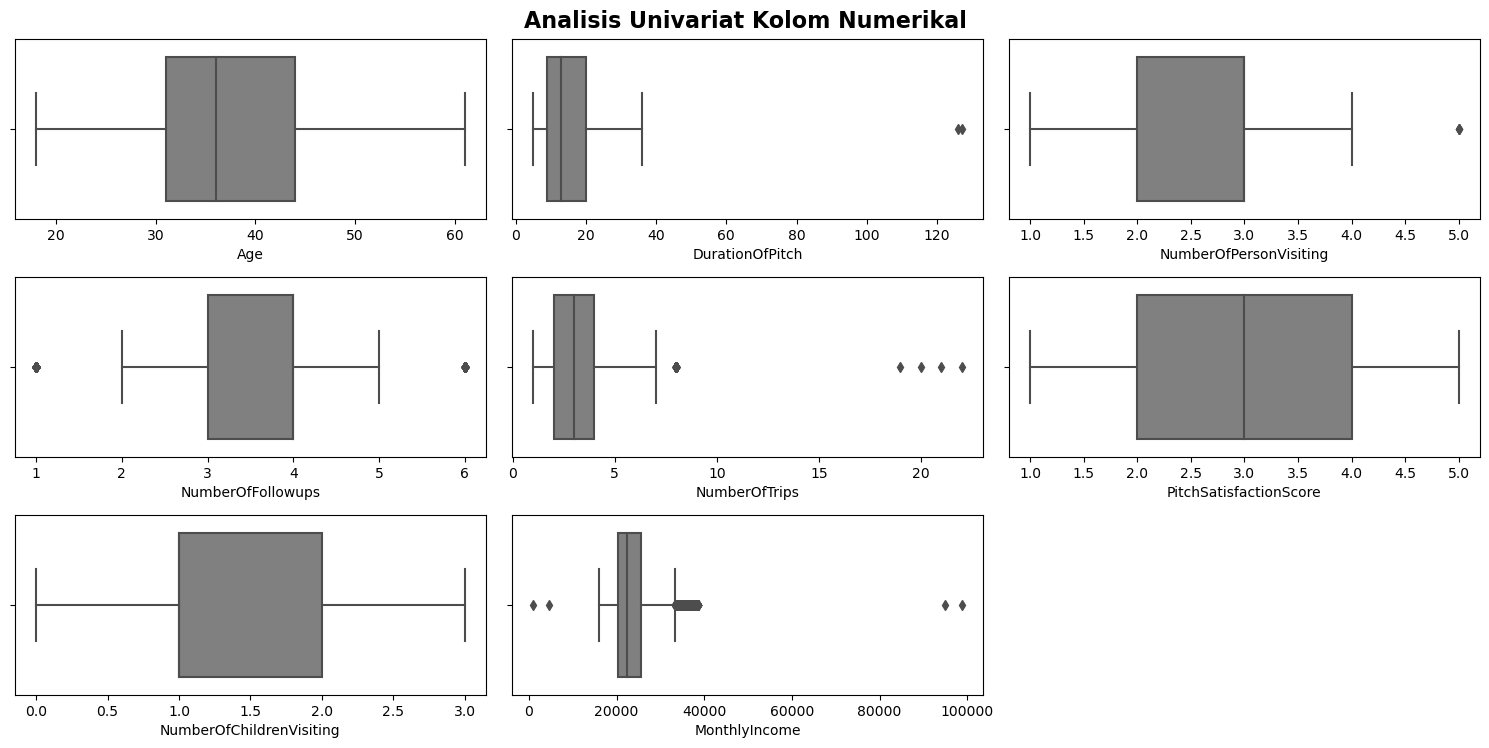

In [18]:
#Individual boxplot (Numerikal)

plt.figure(figsize=(15, 12))
plt.suptitle('Analisis Univariat Kolom Numerikal', fontsize=16, fontweight='bold')
for i in range(0, len(numericals)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(x=finpro[numericals[i]], color='gray')
    plt.xlabel(numericals[i])
    plt.tight_layout()

Berdasarkan hasil analisis univariat terhadap kolom numerikal menggunakan Boxplot, dapat ditarik beberapa insight seperti:

● Dalam bentuk visualisasi boxplot diatas untuk kategori numericals, dapat disimpulkan bahwa ada beberapa kolom yang distribusinya memiliki outlier yaitu kolom `DurationOfPitch, NumberOfPersonVisiting, NumberOfFollowups, NumberOfTrip dan MonthlyIncome`.

● Yang harus di follow up saat data pre-processing adalah melakukan handling pada kolom yang kosong, handling outliers, dan Normalization/Standardization.


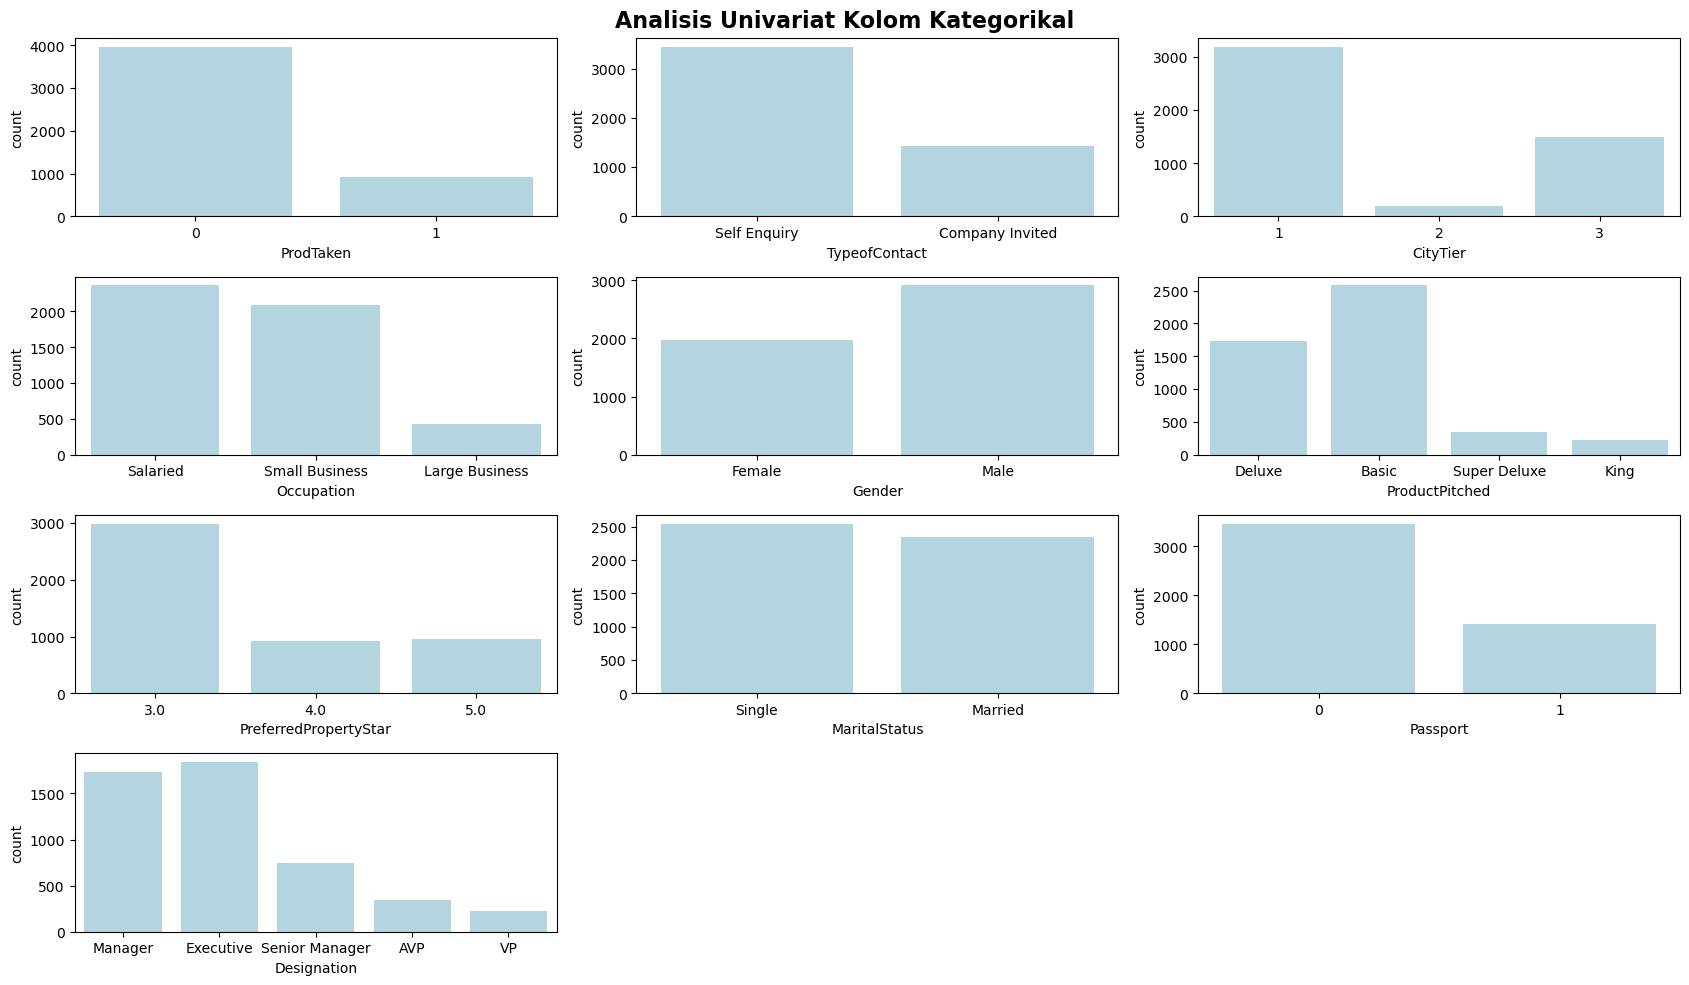

In [19]:
#Individual displot (Kategorikal)

plt.figure(figsize=(17, 12))
plt.suptitle('Analisis Univariat Kolom Kategorikal', fontsize=16, fontweight='bold')
for i in range(0, len(categoricals)):
    plt.subplot(5, 3, i+1)
    sns.countplot(x=finpro[categoricals[i]], color='lightblue')
    plt.xlabel(categoricals[i])
    plt.tight_layout()

Berdasarkan hasil analisis univariat terhadap kolom kategorikal, dapat ditarik beberapa insight seperti:

● Kolom `TypeofContact` menunjukkan bahwa kebanyakkan customer melalui jalur **self enquiry**

● Kolom `Occupation` didominasi oleh karyawan biasa (**salaried**) dan customer dengan **small business**

● Kolom `ProductPitched` didominasi oleh produk **deluxe** dan **basic**.

● Kolom `MaritalStatus` didominasi oleh customer yang sudah menikah namun data single dan unmarried dapat dijadikan sebagai satu data.

● Kolom `Designation` didominasi oleh customer dengan posisi **manager** dan **executive**.

## **3. Multivariate Analysis**

   Lakukan multivariate analysis (seperti correlation heatmap dan category plots, sesuai yang diajarkan di kelas). Tuliskan hasil observasinya, seperti:

    A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana saja yang paling relevan dan harus dipertahankan?

    B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu dilakukan terhadap feature itu?

* Tuliskan juga jika memang tidak ada feature yang saling berkorelasi

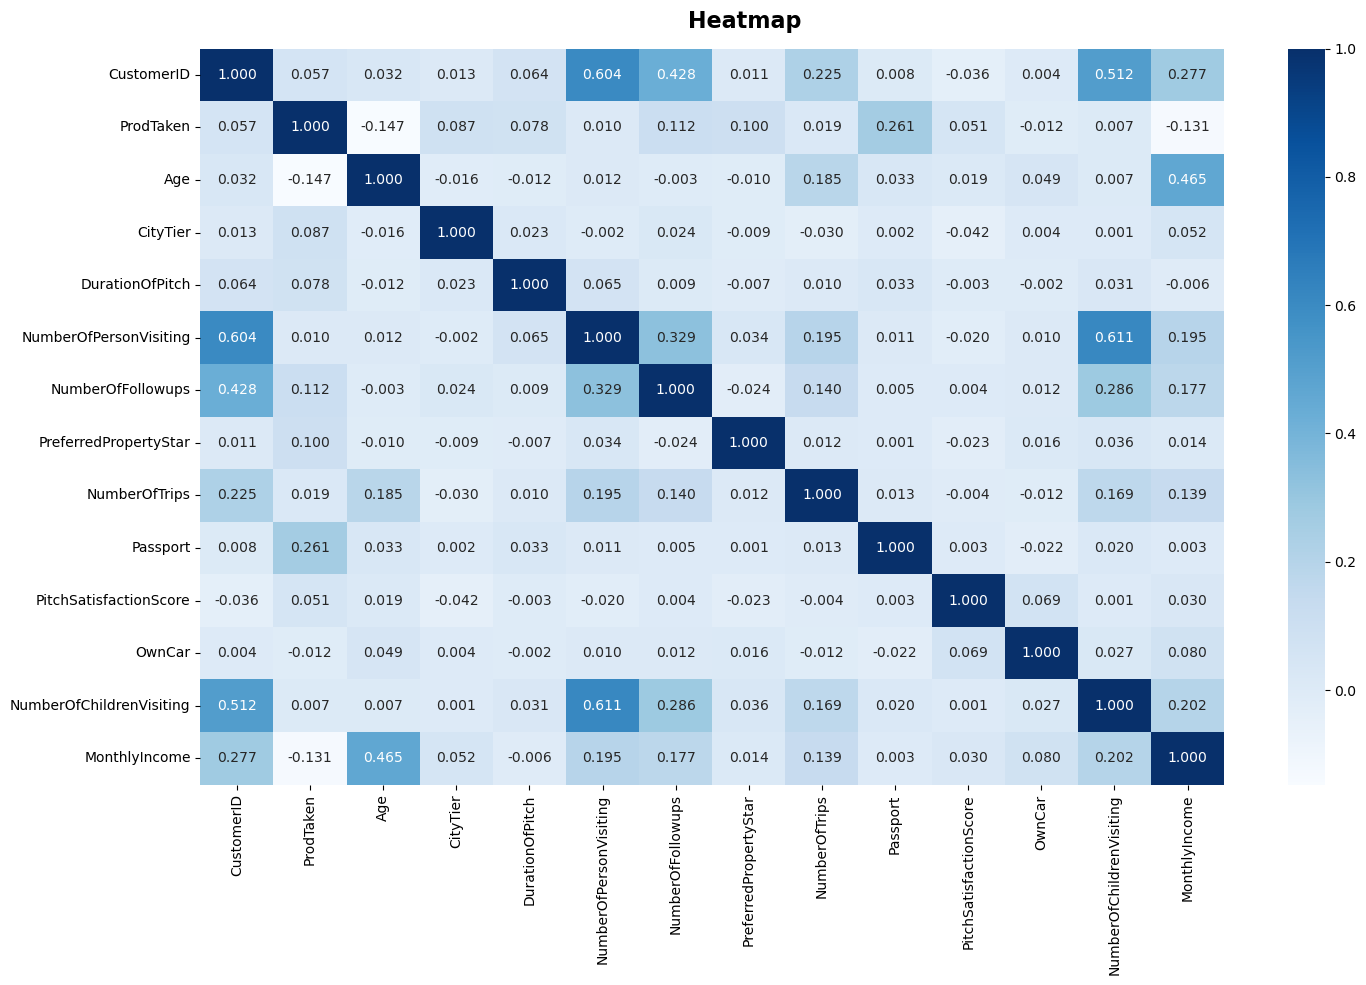

In [20]:
#Analisis Multivariat menggunakan boxplot

plt.figure(figsize=(15, 10))
plt.suptitle('Heatmap', fontsize=16, fontweight='bold')
sns.heatmap(finpro.corr(), cmap='Blues', annot=True, fmt='.3f')
plt.tight_layout()

Insight yang didapatkan berdasarkan heatmap correlation yang telah di plot adalah:


● Terdapat korelasi positif antara `ProdTaken` dengan `Passport`, dimana **ada kemungkinan apabila seorang customer telah mempunyai passort, kemungkinan besar customer mengambil produk yang ditawarkan semakin besar**.

● Terdapat korelasi positif yang cukup kuat antara `Age` dengan `MonthlyIncome`, dimana **ada kemungkinan apabila seorang customer mempunyai umur yang lebih tua, kemungkinan besar customer mempunyai income yang lebih besar**.

● Terdapat korelasi positif yang cukup kuat antara `NumberOfFollowups` dengan `NumberOfPersonVisiting`, dimana **ada kemungkinan apabila seorang customer yang mengajak lebih dari 1 orang berkemungkinan besar untuk mendengarkan pitching yang ditawarkan**.

● Terdapat korelasi positif yang sangat kuat antara `NumberOfChildrenVisiting` dengan `NumberOfPersonVisiting`

● Selain itu, terdapat beberapa korelasi-korelasi lainnya baik secara positif maupun negatif, namun dapat dikatakan korelasi tersebut terbilang lemah.

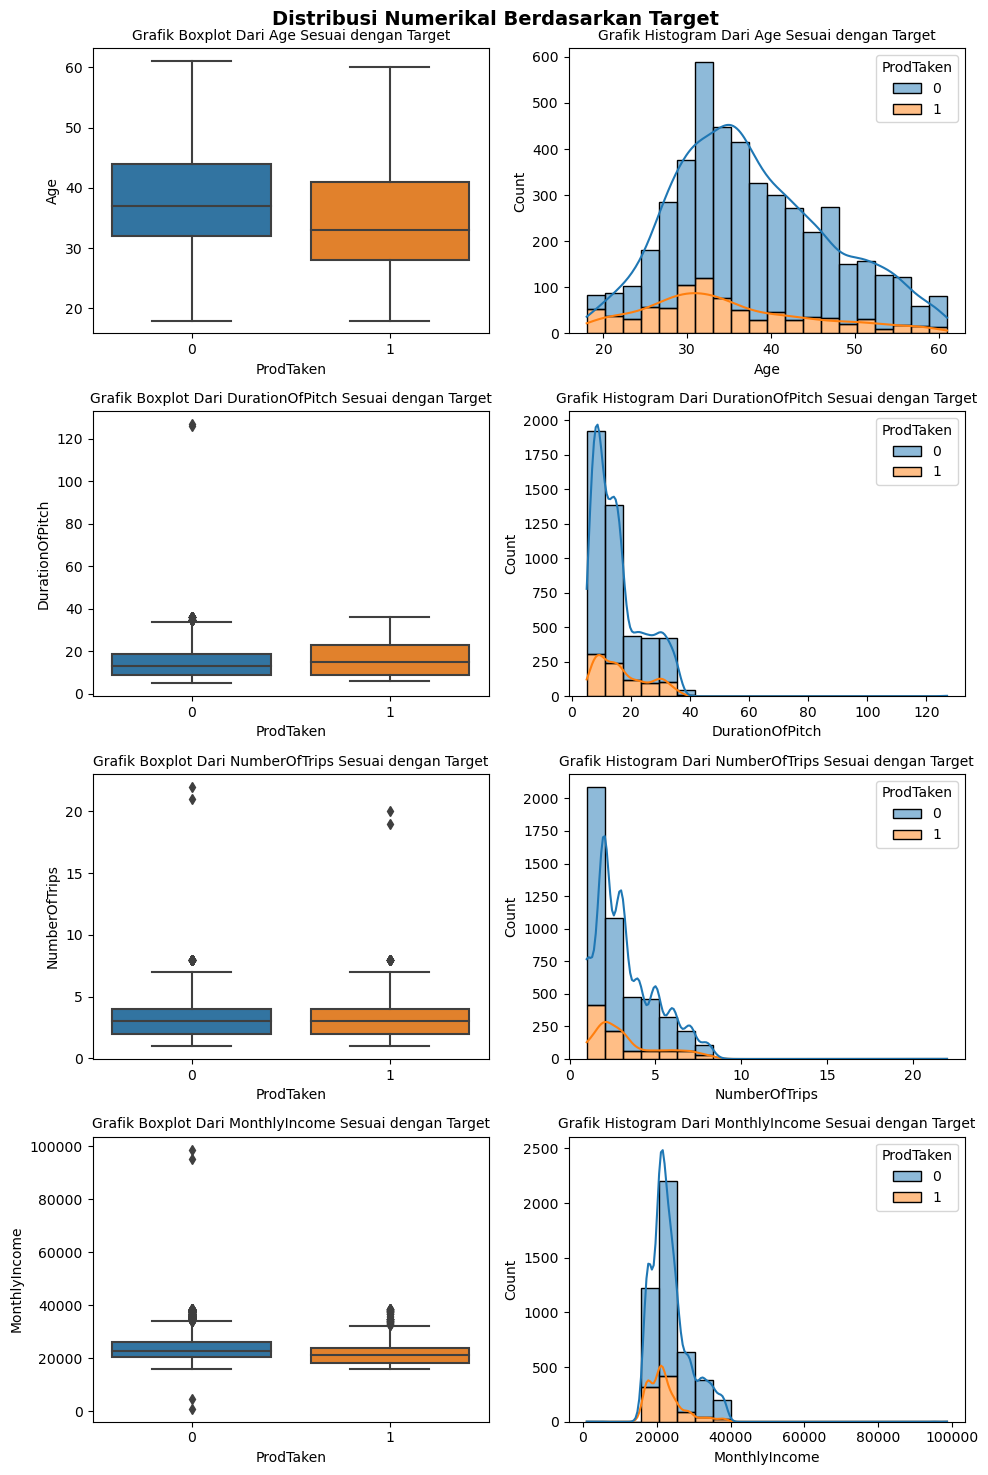

In [21]:
numerical2 = ['Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']
fig, ax = plt.subplots(4, 2, figsize=(10,15))
fig.suptitle('Distribusi Numerikal Berdasarkan Target', fontsize=14, fontweight='bold', ha='center')
for i, col in enumerate(numerical2):
    sns.boxplot(data=finpro, x='ProdTaken', y=col, ax=ax[i,0])
    ax[i,0].set_title(f'Grafik Boxplot Dari {col} Sesuai dengan Target', fontsize=10)
    sns.histplot(data=finpro, x=col, hue='ProdTaken', bins=20, kde=True, multiple='stack', ax=ax[i,1])
    ax[i,1].set_title(f'Grafik Histogram Dari {col} Sesuai dengan Target', fontsize=10)
fig.tight_layout()

Insight yang didapatkan dari grafik-grafik tersebut adalah:

● Kebanyakkan customer yang membeli produk yang ditawarkan berusia pada rentang 28-38 tahun.

● Pitching yang dilakukan dibawah 20 menit mempunyai kemungkinan lebih sukses untuk menarik pelanggan, namun terdapat outlier yang cukup jauh bila dibandingkan dengan datanya.

● Customer pada umumnya melakukan perjalanan hanya sampai rata-rata 5x, meskipun terdapat outlier hingga diatas 20x.

● Kebanyakkan customer yang terdapat perusahaan mempunyai income dari angka 20rb hingga 30rb.

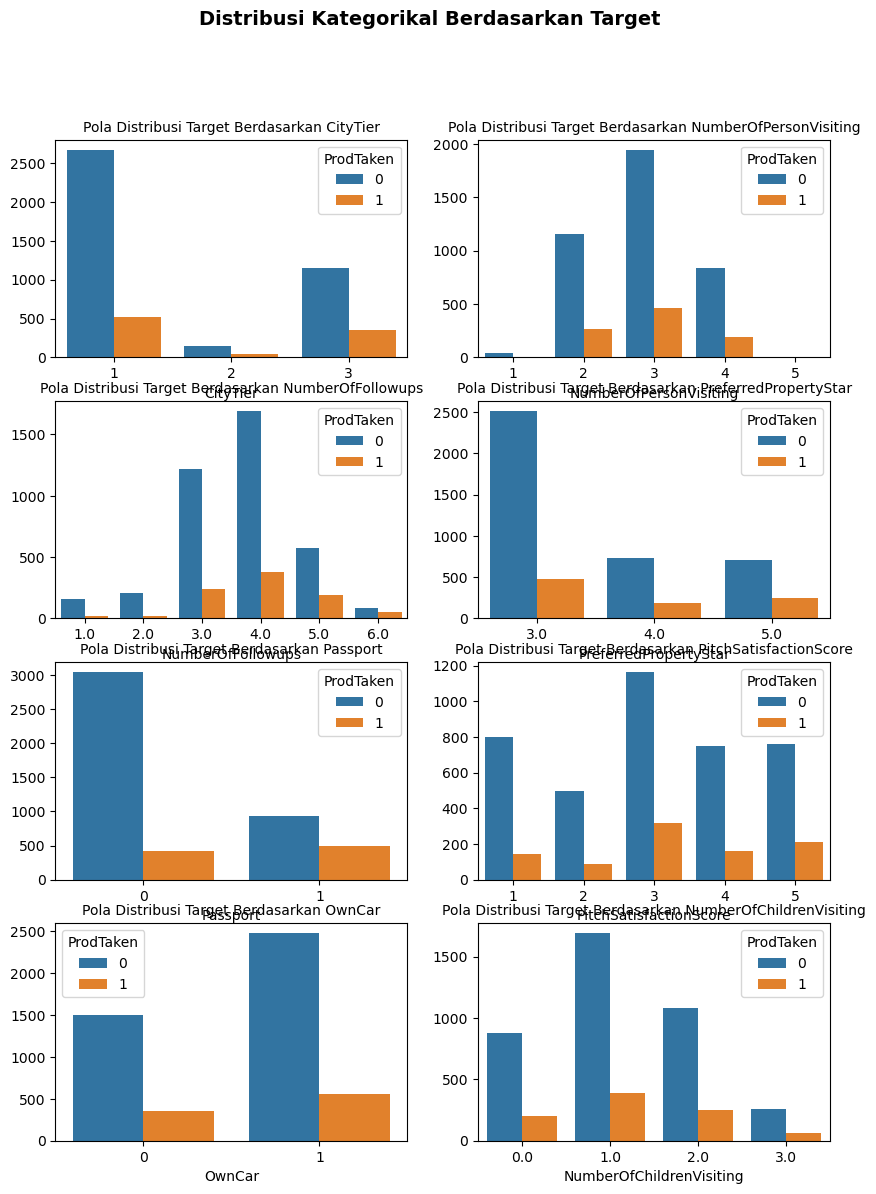

In [22]:
categorical2 = ['CityTier', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
            'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting']
fig, axes = plt.subplots(4, 2, figsize=(10,13))
fig.suptitle('Distribusi Kategorikal Berdasarkan Target', fontsize=14, fontweight='bold')
for ax, col in zip(axes.flatten(), finpro[categorical2].columns):
    sns.countplot(data=finpro, x=col, hue='ProdTaken', ax=ax)
    ax.set_title(f'Pola Distribusi Target Berdasarkan {col}', fontsize=10)
    ax.set_ylabel('')


Insight yang didapatkan dari grafik-grafik tersebut adalah:

● Kebanyakkan customer yang membeli produk yang ditawarkan, tinggal di kota tier 1 dan tier 3.

● Customer yang dimiliki perusahaan kebanyakkan telah berkeluarga, bahkan mempunyai 1 anak hingga 2 anak dan customer tersebut yang lebih sering mengambil paket yang ditawarkan.

● Customer yang telah mengambil paket yang ditawarkan apabila telah mendengarkan follow up pitching dari agent setelah 3-5x followup.

● Customer yang telah mengambil paket yang ditawarkan kebanyakkan lebih menyukai properti bintang 3.

● Customer yang telah mengambil paket yang ditawarkan kebanyakkan telah mempunyai paspor

● Customer yang telah mengambil paket yang ditawarkan kebanyakkan merasa puas dengan pitching yang telah ditawarkan oleh agent.

● Customer yang telah mengambil paket yang ditawarkan kebanyakkan telah mempunyai kendaraan.

● Poin terakhir kembali mendukung poin kedua pada insight ini dimana customer perusahaan kebanyakkan telah mempunyai anak dari 1 hingga 2

## **4. Business Insight**

    Selain EDA, lakukan juga beberapa analisis dan visualisasi untuk menemukan suatu business insight. Tuliskan minimal 3 insight, dan berdasarkan insight tersebut jelaskan rekomendasinya untuk bisnis.

In [23]:
finpro_passport = finpro.groupby(['Passport','ProdTaken']).CustomerID.count().reset_index()\
        .merge(finpro.groupby(['Passport']).CustomerID.count(),on='Passport')
finpro_passport['Percentage']=round(finpro_passport.CustomerID_x/finpro_passport.CustomerID_y*100,2)
finpro_passport = finpro_passport[finpro_passport.ProdTaken==1].sort_values(by='Percentage',ascending=False).reset_index(drop=True)
finpro_passport


,Passport,ProdTaken,CustomerID_x,CustomerID_y,Percentage
0,1,1,494,1422,34.74
1,0,1,426,3466,12.29


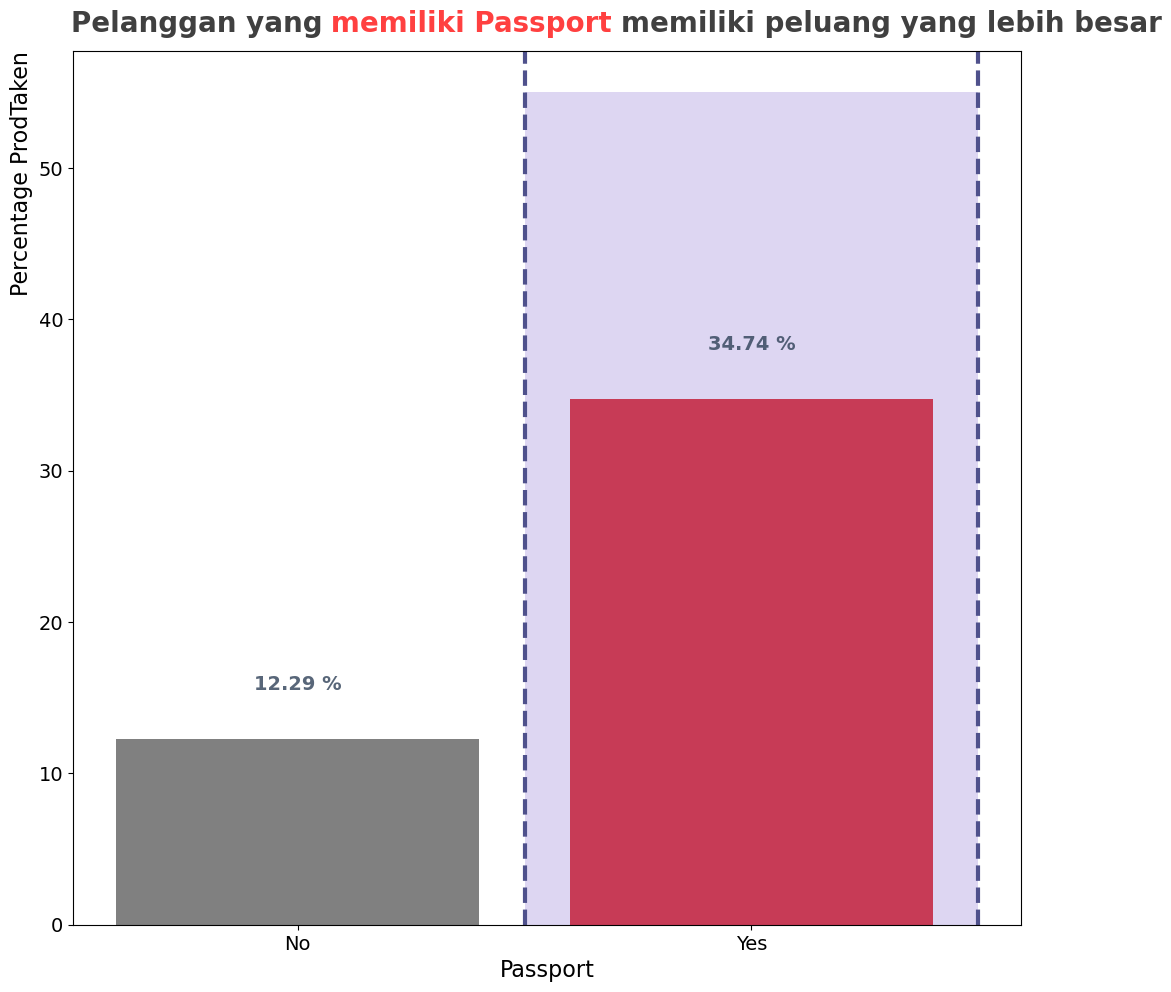

In [24]:
plt.figure(figsize=(12,10))

sns.barplot( x='Passport',y='Percentage',data=finpro_passport, palette=['grey'])
sns.barplot( x='Passport',y=[34.74,0],data=finpro_passport, palette=['r'])

plt.xlabel('Passport', fontsize=16)
plt.ylabel('Percentage ProdTaken', fontsize=16,loc='top')
plt.yticks(range(0,68,10),size=14)
plt.xticks([1,0],labels = ['Yes','No'],size=14)
plt.axvline(x=.5, color='#4F518C', linestyle='--', linewidth=3)
plt.axvline(x=1.5, color='#4F518C', linestyle='--', linewidth=3)
plt.stackplot(np.arange(0.5, 1.6 ,1), [[55]], colors='#907AD6', alpha=0.3)

data_bars = finpro_passport.sort_values('Percentage',ascending=True)['Percentage'].values
for num, text in enumerate(data_bars):
    plt.text(x=num,y=text+3,s=str(text)+' %' ,fontsize=14, fontweight='bold',
            color='#2E4057', alpha=0.8, va='bottom', ha='center')

plt.text(s='Pelanggan yang                               memiliki peluang yang lebih besar',
        x=-0.5, y=59, fontsize=20, fontweight='bold', alpha =.75,)
plt.text(s='                           memiliki Passport',
        x=-0.5, y=59, fontsize=20, fontweight='bold', alpha =.75,c='r')

plt.tight_layout()
plt.show()

In [25]:
finpro_product = finpro.groupby(['ProductPitched', 'ProdTaken'])['CustomerID'].count().reset_index(name='TotalCust')\
        .merge(finpro.groupby(['ProductPitched'])['CustomerID'].count(),on = 'ProductPitched')
finpro_product = finpro_product[finpro_product.ProdTaken==1].reset_index(drop=True)
finpro_product['Percentage']=round(finpro_product.TotalCust/finpro_product.CustomerID*100,2)
finpro_product = finpro_product.sort_values(by='Percentage',ascending=False)
finpro_product

,ProductPitched,ProdTaken,TotalCust,CustomerID,Percentage
0,Basic,1,676,2584,26.16
1,Deluxe,1,204,1732,11.78
2,King,1,20,230,8.70
3,Super Deluxe,1,20,342,5.85


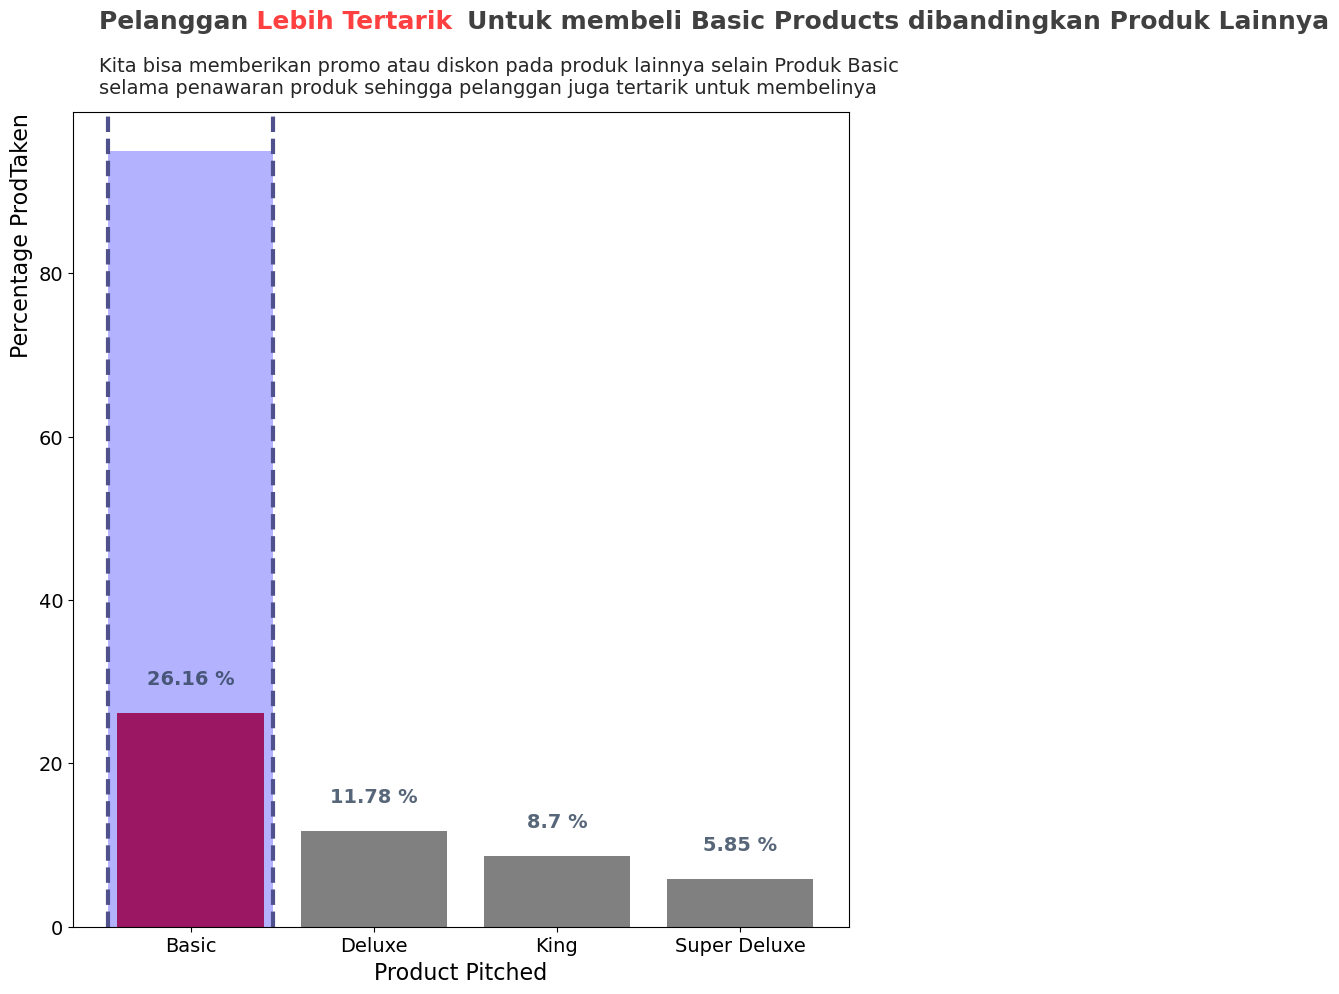

In [26]:
plt.figure(figsize=(12,10))

sns.barplot( x='ProductPitched',y='Percentage',data=finpro_product, palette=['grey'])
sns.barplot( x='ProductPitched',y=[26.16,0,0,0],data=finpro_product, palette=['r'])

plt.xlabel('Product Pitched', fontsize=16)
plt.ylabel('Percentage ProdTaken', fontsize=16,loc='top')
plt.yticks(range(0,110,20),size=14)
plt.xticks(size=14)
plt.axvline(x=-0.45, color='#4F518C', linestyle='--', linewidth=3)
plt.axvline(x=0.45, color='#4F518C', linestyle='--', linewidth=3)
plt.stackplot(np.arange(-0.45, 0.5 ,0.45), [[95]], colors='blue', alpha=0.3)

data_bars = finpro_product.sort_values('Percentage',ascending=False)['Percentage'].values
for num, text in enumerate(data_bars):
    plt.text(x=num,y=text+3,s=str(text)+' %' ,fontsize=14, fontweight='bold',
            color='#2E4057', alpha=0.8, va='bottom', ha='center')
plt.text(s='Pelanggan                         Untuk membeli Basic Products dibandingkan Produk Lainnya',
        x=-0.5, y=110, fontsize=18, fontweight='bold', alpha =.75)
plt.text(s='                  Lebih Tertarik',c='r',
        x=-0.5, y=110, fontsize=18, fontweight='bold', alpha =.75)
plt.text(s='Kita bisa memberikan promo atau diskon pada produk lainnya selain Produk Basic\nselama penawaran produk sehingga pelanggan juga tertarik untuk membelinya',
        x=-0.5, y=102, fontsize=14, alpha =.85)


plt.tight_layout()
plt.show()

In [27]:
finpro_followup = finpro.groupby(['NumberOfFollowups', 'ProdTaken'])['CustomerID'].count().reset_index(name='TotalCust')\
        .merge(finpro.groupby(['NumberOfFollowups'])['CustomerID'].count(),on = 'NumberOfFollowups')
finpro_followup = finpro_followup[finpro_followup.ProdTaken==1].reset_index(drop=True)
finpro_followup['Percentage']=round(finpro_followup.TotalCust/finpro_followup.CustomerID*100,2)
finpro_followup

,NumberOfFollowups,ProdTaken,TotalCust,CustomerID,Percentage
0,1.0,1,20,176,11.36
1,2.0,1,24,229,10.48
2,3.0,1,244,1466,16.64
3,4.0,1,379,2068,18.33
4,5.0,1,191,768,24.87
5,6.0,1,54,136,39.71


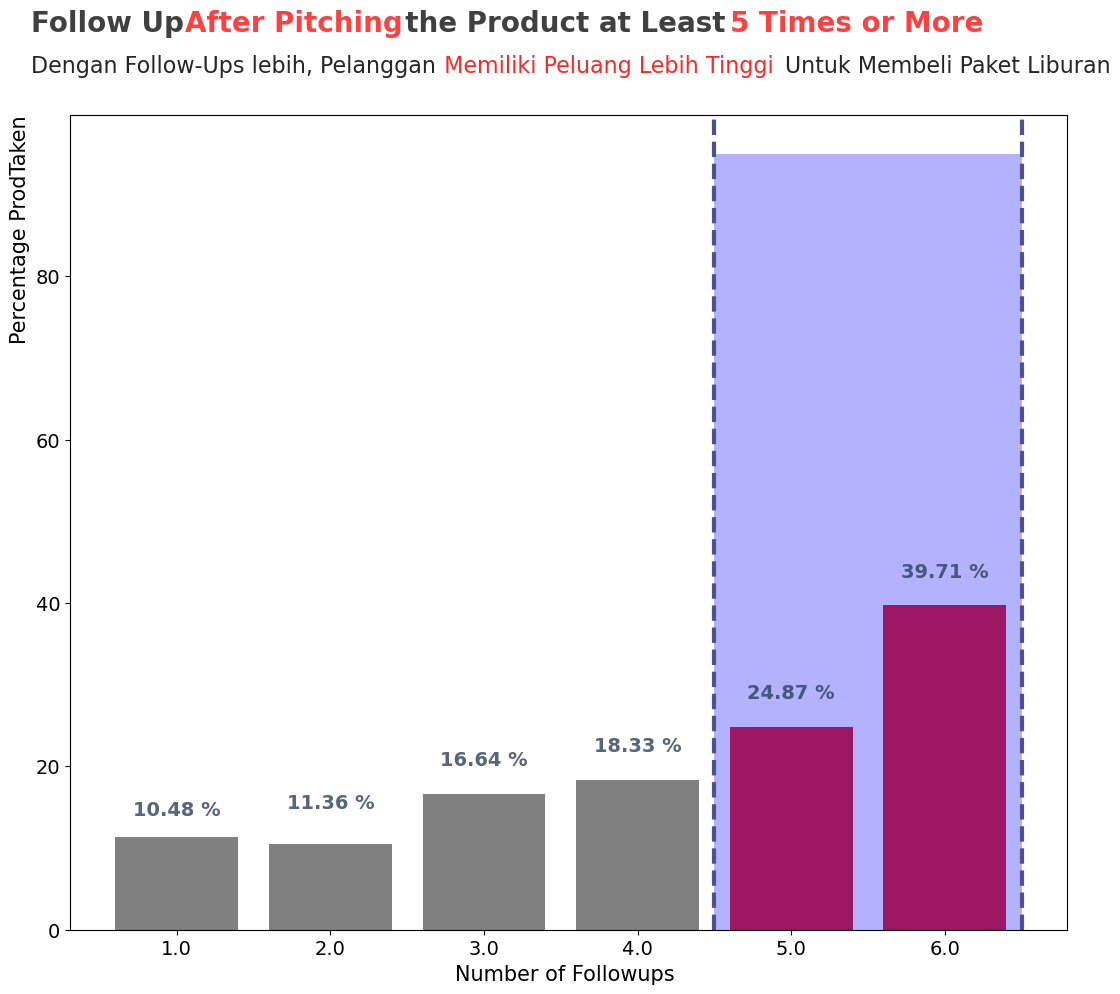

In [28]:
plt.figure(figsize=(12,10))

sns.barplot( x='NumberOfFollowups',y='Percentage',data=finpro_followup, palette=['grey'])
sns.barplot( x='NumberOfFollowups',y=[0,0,0,0,24.87,39.71],data=finpro_followup, palette=['r'])
plt.xlabel('Number of Followups ', fontsize=15)
plt.ylabel('Percentage ProdTaken', fontsize=15,loc='top')
plt.yticks(range(0,110,20),size=14)
plt.xticks(size=14)
plt.axvline(x=3.5, color='#4F518C', linestyle='--', linewidth=3)
plt.axvline(x=5.5, color='#4F518C', linestyle='--', linewidth=3)
plt.stackplot(np.arange(3.5, 6,0.5 ), [[95]], colors='blue', alpha=0.3)

data_bars = finpro_followup.sort_values('Percentage',ascending=True)['Percentage'].values
for num, text in enumerate(data_bars):
    plt.text(x=num,y=text+3,s=str(text)+' %' ,fontsize=14, fontweight='bold',
            color='#2E4057', alpha=0.8, va='bottom', ha='center')
plt.text(s='Follow Up                       the Product at Least',
        x=-0.95, y=110, fontsize=20, fontweight='bold', alpha =.75)
plt.text(s='                After Pitching                                  5 Times or More',
        x=-0.95, y=110, fontsize=20, fontweight='bold', alpha =.75,c='r')
plt.text(s='Dengan Follow-Ups lebih, Pelanggan                                                 Untuk Membeli Paket Liburan',
        x=-0.95, y=105, fontsize=16, alpha =.85)
plt.text(s='                                                          Memiliki Peluang Lebih Tinggi',
        x=-0.95, y=105, fontsize=16, alpha =.85,c='r')

plt.tight_layout()
plt.show()

In [29]:
finpro_design = finpro.groupby(['Designation', 'ProdTaken'])['CustomerID'].count().reset_index(name='TotalCust')\
        .merge(finpro.groupby(['Designation'])['CustomerID'].count(),on = 'Designation')
finpro_design = finpro_design[finpro_design.ProdTaken==1].reset_index(drop=True)
finpro_design['Percentage']=round(finpro_design.TotalCust/finpro_design.CustomerID*100,2)
finpro_design = finpro_design.sort_values(by='Percentage',ascending=False)
finpro_design

,Designation,ProdTaken,TotalCust,CustomerID,Percentage
1,Executive,1,552,1842,29.97
3,Senior Manager,1,124,742,16.71
2,Manager,1,204,1732,11.78
4,VP,1,20,230,8.70
0,AVP,1,20,342,5.85


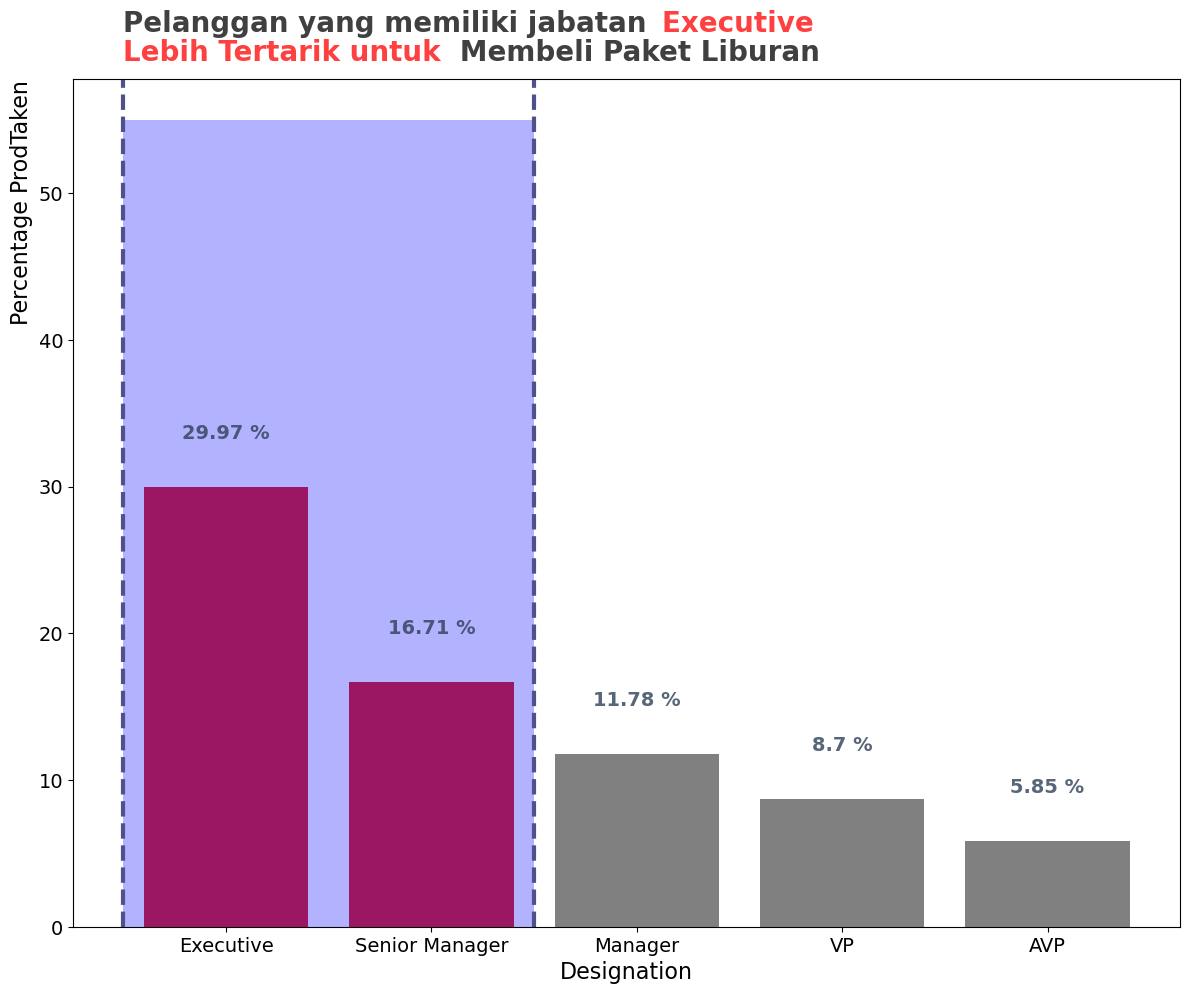

In [30]:
plt.figure(figsize=(12,10))

sns.barplot( x='Designation',y='Percentage',data=finpro_design, palette=['grey'])
sns.barplot( x='Designation',y=[29.97,16.71, 0, 0, 0],data=finpro_design, palette=['r'])

plt.xlabel('Designation', fontsize=16)
plt.ylabel('Percentage ProdTaken', fontsize=16,loc='top')
plt.yticks(range(0,68,10),size=14)
plt.xticks(size=14)
plt.axvline(x=-0.5, color='#4F518C', linestyle='--', linewidth=3)
plt.axvline(x=1.5, color='#4F518C', linestyle='--', linewidth=3)
plt.stackplot(np.arange(-0.5, 2 ,2), [[55]], colors='blue', alpha=0.3)

data_bars = finpro_design.sort_values('Percentage',ascending=False)['Percentage'].values
for num, text in enumerate(data_bars):
    plt.text(x=num,y=text+3,s=str(text)+' %' ,fontsize=14, fontweight='bold',
            color='#2E4057', alpha=0.8, va='bottom', ha='center')
plt.text(s='Pelanggan yang memiliki jabatan                            ',
        x=-0.5, y=61, fontsize=20, fontweight='bold', alpha =.75)
plt.text(s='                                                        Executive',
        x=-0.5, y=61, fontsize=20, fontweight='bold', alpha =.75,c='r')
plt.text(s='Lebih Tertarik untuk ',
        x=-0.5, y=59, fontsize=20, fontweight='bold', alpha =.75,c='r')
plt.text(s='                                   Membeli Paket Liburan',
        x=-0.5, y=59, fontsize=20, fontweight='bold', alpha =.75,)

plt.tight_layout()
plt.show()

In [31]:
finpro_city = finpro.groupby(['CityTier', 'ProdTaken'])['CustomerID'].count().reset_index(name='TotalCust')\
        .merge(finpro.groupby(['CityTier'])['CustomerID'].count(),on = 'CityTier')
finpro_city = finpro_city[finpro_city.ProdTaken==1].reset_index(drop=True)
finpro_city['Percentage']=round(finpro_city.TotalCust/finpro_city.CustomerID*100,2)
finpro_city

,CityTier,ProdTaken,TotalCust,CustomerID,Percentage
0,1,1,520,3190,16.30
1,2,1,46,198,23.23
2,3,1,354,1500,23.60


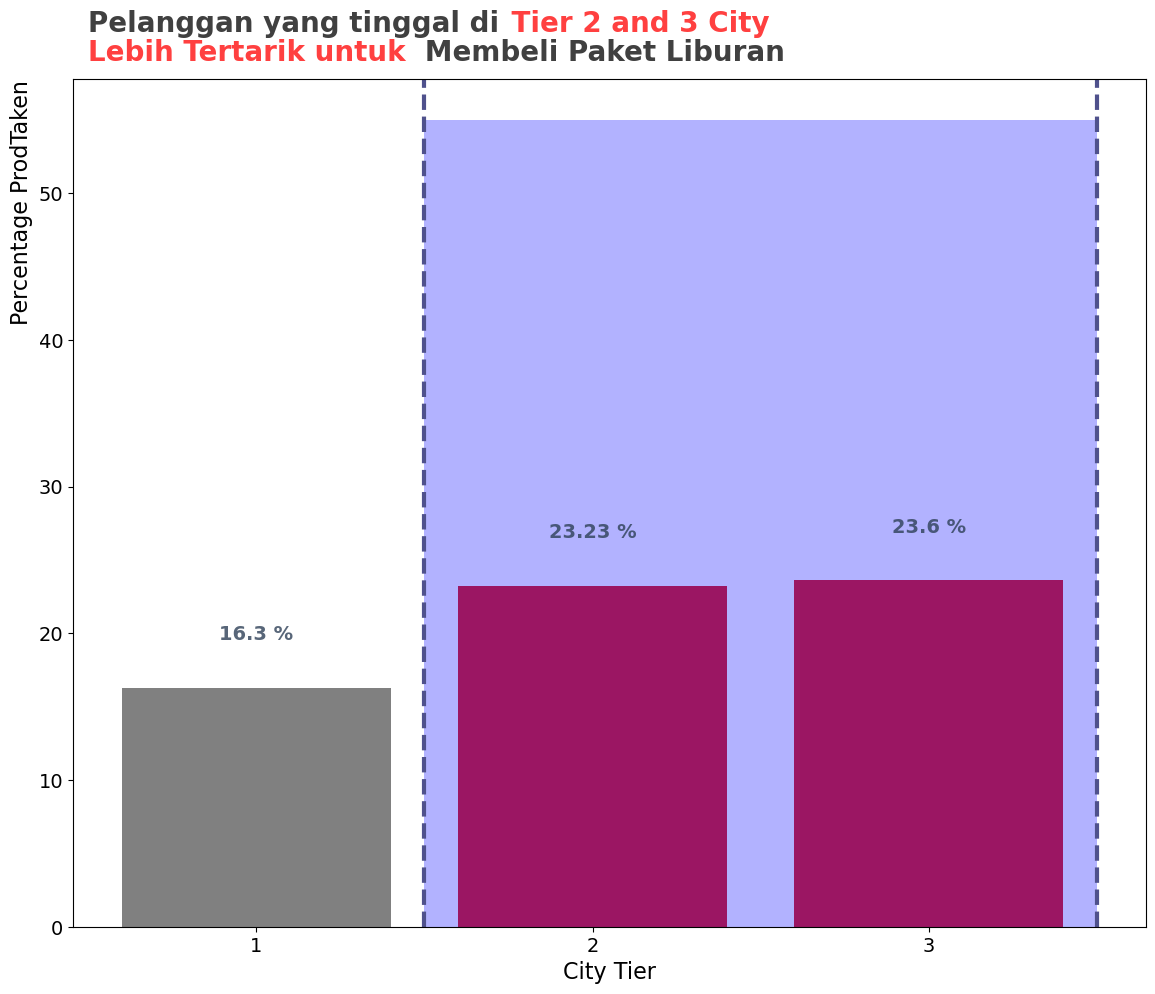

In [32]:
plt.figure(figsize=(12,10))

sns.barplot( x='CityTier',y='Percentage',data=finpro_city, palette=['grey'])
sns.barplot( x='CityTier',y=[0,23.23,23.60],data=finpro_city, palette=['r'])

plt.xlabel('City Tier', fontsize=16)
plt.ylabel('Percentage ProdTaken', fontsize=16,loc='top')
plt.yticks(range(0,68,10),size=14)
plt.xticks(size=14)
plt.axvline(x=.5, color='#4F518C', linestyle='--', linewidth=3)
plt.axvline(x=2.5, color='#4F518C', linestyle='--', linewidth=3)
plt.stackplot(np.arange(0.5, 2.6 ,1), [[55]], colors='blue', alpha=0.3)

data_bars = finpro_city.sort_values('Percentage',ascending=True)['Percentage'].values
for num, text in enumerate(data_bars):
    plt.text(x=num,y=text+3,s=str(text)+' %' ,fontsize=14, fontweight='bold',
            color='#2E4057', alpha=0.8, va='bottom', ha='center')
plt.text(s='Pelanggan yang tinggal di                            ',
        x=-0.5, y=61, fontsize=20, fontweight='bold', alpha =.75)
plt.text(s='                                            Tier 2 and 3 City                            ',
        x=-0.5, y=61, fontsize=20, fontweight='bold', alpha =.75,c='r')
plt.text(s='Lebih Tertarik untuk ',
        x=-0.5, y=59, fontsize=20, fontweight='bold', alpha =.75,c='r')
plt.text(s='                                   Membeli Paket Liburan',
        x=-0.5, y=59, fontsize=20, fontweight='bold', alpha =.75,)

plt.tight_layout()
plt.show()

In [33]:
def umur(x):
    if x>=18 and x<=25:
        return 'Adolescent'
    elif x<=45:
        return 'Adults'
    else:
        return 'Elderly'

finpro['AgeGroup'] = finpro['Age'].apply(lambda x : umur(x))
finpro_age = finpro.groupby(['AgeGroup', 'ProdTaken'])['CustomerID'].count().reset_index(name='TotalCust')\
             .merge(finpro.groupby(['AgeGroup'])['CustomerID'].count(), on='AgeGroup')

finpro_age = finpro_age[finpro_age.ProdTaken==1].reset_index(drop=True)
finpro_age['Percentage']=round(finpro_age.TotalCust/finpro_age.CustomerID*100,2)
finpro_age

,AgeGroup,ProdTaken,TotalCust,CustomerID,Percentage
0,Adolescent,1,143,347,41.21
1,Adults,1,589,3341,17.63
2,Elderly,1,188,1200,15.67


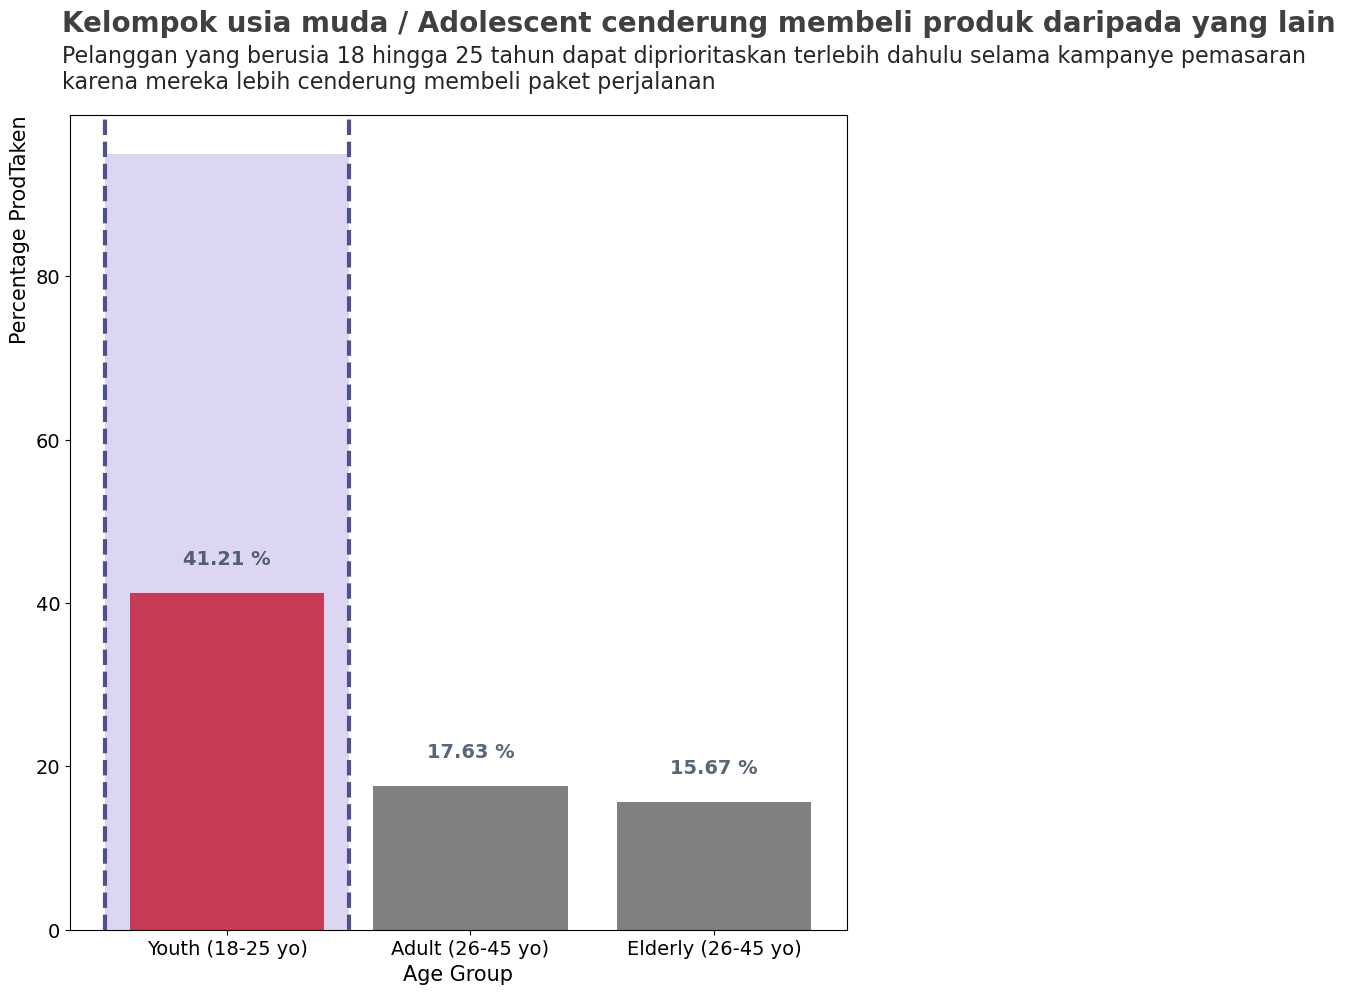

In [34]:
plt.figure(figsize=(12,10))

sns.barplot( x='AgeGroup',y='Percentage',data=finpro_age, palette=['grey'])
sns.barplot( x='AgeGroup',y=[41.21,0,0],data=finpro_age, palette=['r'])

plt.xlabel('Age Group', fontsize=15)
plt.ylabel('Percentage ProdTaken', fontsize=15,loc='top')
plt.yticks(range(0,110,20),size=14)
plt.xticks([0,1,2],['Youth (18-25 yo)','Adult (26-45 yo)','Elderly (26-45 yo)'],size=14)


plt.axvline(x=-0.5, color='#4F518C', linestyle='--', linewidth=3)
plt.axvline(x=0.5, color='#4F518C', linestyle='--', linewidth=3)
plt.stackplot(np.arange(-0.5, 0.6,0.5 ), [[95]], colors='#907AD6', alpha=0.3)

data_bars = finpro_age.sort_values('Percentage',ascending=False)['Percentage'].values
for num, text in enumerate(data_bars):
    plt.text(x=num,y=text+3,s=str(text)+' %' ,fontsize=14, fontweight='bold',
            color='#2E4057', alpha=0.8, va='bottom', ha='center')

plt.text(s="Kelompok usia muda / Adolescent cenderung membeli produk daripada yang lain",
        x=-0.68, y=110, fontsize=20, fontweight='bold', alpha =.75)
plt.text(s='Pelanggan yang berusia 18 hingga 25 tahun dapat diprioritaskan terlebih dahulu selama kampanye pemasaran\nkarena mereka lebih cenderung membeli paket perjalanan',
        x=-0.68, y=103, fontsize=16, alpha =.85)
legend_labels, _= ax.get_legend_handles_labels()

plt.tight_layout()
plt.show()

### Insight ###

● Customer yang mengambil produk yang ditawarkan lebih senang terhadap produk basic dan standard.

● Customer yang semakin sering di follow up akan mempunyai kesempatan lebih besar untuk mengambil produk yang ditawarkan.

● Customer perusahaan yang mengambil produk yang ditawarkan lebih banyak tinggal di kota tier 2 dan 3.

● Customer yang mengambil produk perusahaan yang ditawarkan lebih banyak telah mempunyai paspor.

● Customer yang mengambil produk perusahaan lebih banyak berada di usia 18 hingga 25 tahun.

### Rekomendasi Bisnis

● Penjualan terbanyak adalah product dengan tipe Basic dan Deluxe, dari paket tersebut kita bisa memberikan diskon kepada pelanggan, agar banyak pelanggan yang membeli paket liburan.

● Untuk bagian telemarketing, melakukan strategi pemasaran (Agent) dengan Follow Up kurang lebih 6 kali dengan max durasi telpon 20 menit, karena semakin sering di follow up akan mempunyai kesempatan lebih besar untuk mengambil produk yang ditawarkan

● Melakukan strategi target market pada pelanggan dengan status Single dengan status pekerjaan Salaried dengan usia antara 25 - 45 tahun.

● Memberikan best service dan diskon tambahan pada pelanggan dengan status Married dengan jabatan Manager dan Senior Manager dengan usia rata rata 33 - 45 tahun dengan pendapatan perbulan 21000 - 30000, untuk menambah pelanggan yang membeli paket liburan dari kalangan tersebut.

# STAGE 2

In [35]:
# import pandas as pd
# import os
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# #from sklearn.model_selection import train_test_split
# from scipy import stats
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler
# from matplotlib.ticker import FuncFormatter

# #from sklearn.feature_selection import VarianceThreshold
# from sklearn.feature_selection import SelectKBest, f_classif, chi2
# from imblearn import under_sampling, over_sampling
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.over_sampling import RandomOverSampler, SMOTE

# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import ConfusionMatrixDisplay
# from sklearn.metrics import confusion_matrix
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from xgboost import XGBClassifier

# from sklearn.metrics import accuracy_score
# from sklearn.metrics import precision_score
# from sklearn.metrics import recall_score
# from sklearn.metrics import f1_score
# from sklearn.metrics import matthews_corrcoef
# from sklearn.metrics import roc_auc_score

## Handling Missing Values

In [36]:
#Mengecheck jumlah kolom yang memiliki missing value

finpro.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
AgeGroup                      0
dtype: int64

Berikut adalah strategi kita mengatasi missing values pada setiap kolom.

- `Age`                      : impute dengan nilai average (dari df.describe kita tau distribusinya mendekati normal)
- `DurationOfPitch`          : impute dengan nilai median (dari df.describe kita tau distribusinya skewed)
- `NumberOfFollowups`        : impute dengan nilai fillna(0, inplace=True) (dari df.describe kita tau distribusinya nilai konstan)
- `NumberOfTrips`            : impute dengan nilai median (dari df.describe kita tau distribusinya skewed)
- `NumberOfChildrenVisiting` : impute dengan nilai fillna(0, inplace=True) (dari df.describe kita tau distribusinya nilai konstan)
- `MonthlyIncome`            : impute dengan nilai median (dari df.describe kita tau distribusinya skewed)



In [37]:
#Handling Missing Values Numericals Kolom Age, NumberOfFollowups dan NumberOfChildrenVisiting menggunakan mean / average dan fillna karena ada yang mengandung nilai konstan


finpro['Age'].fillna(finpro['Age'].mean(), inplace=True)
finpro['NumberOfFollowups'].fillna(0, inplace=True)
finpro['NumberOfChildrenVisiting'].fillna(0, inplace=True)

In [38]:
#Handling Missing Values Numericals DurationOfPitch, NumberOfTrips dan MonthlyIncome menggunakan median


finpro['DurationOfPitch'].fillna(finpro['DurationOfPitch'].median(), inplace=True)
finpro['NumberOfTrips'].fillna(finpro['NumberOfTrips'].median(), inplace=True)
finpro['MonthlyIncome'].fillna(finpro['MonthlyIncome'].median(), inplace=True)

In [39]:
#Handling Missing Values Categoricals


finpro['TypeofContact'] = finpro['TypeofContact'].fillna(finpro['TypeofContact'].mode()[0])
finpro['PreferredPropertyStar'] = finpro['PreferredPropertyStar'].fillna(finpro['PreferredPropertyStar'].mode()[0])

In [40]:
finpro.isna().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
AgeGroup                    0
dtype: int64

## Value Replacement

In [41]:
# Handling Inconsistent Data pada kolom Gender, MaritalStatus, ProductPitched dan Occupation

finpro ['Gender'] = finpro['Gender'].replace('Fe Male', 'Female')
finpro ['MaritalStatus'] = finpro['MaritalStatus'].replace(['Unmarried', 'Divorced'], 'Single')
finpro['ProductPitched'] = finpro['ProductPitched'].replace(['Standard'],'Basic')
finpro['Occupation'] = finpro['Occupation'].replace(['Free Lancer'],'Small Business')



print('Gender :', finpro['Gender'].unique().tolist())
print('Marital Status:', finpro['MaritalStatus'].unique().tolist())
print('ProductPitched :', finpro['ProductPitched'].unique().tolist())
print('Occupation:', finpro['Occupation'].unique().tolist())

Gender : ['Female', 'Male']
Marital Status: ['Single', 'Married']
ProductPitched : ['Deluxe', 'Basic', 'Super Deluxe', 'King']
Occupation: ['Salaried', 'Small Business', 'Large Business']


## Handling Duplicate Values


In [42]:
#Cek jumlah duplicated rows dari semua kolom

finpro.duplicated().sum()


0

In [43]:
# Cek jumlah duplicated rows dari semua kolom saja, kecuali CustomerID*

finpro.duplicated(subset=['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome']).sum()

141

In [44]:
#remove Customer ID to see duplicates rows

finpro.drop('CustomerID', axis = 1, inplace=True)
print (f'Jumlah baris sebelum difilter data adalah {finpro.shape[0]}')

Jumlah baris sebelum difilter data adalah 4888


In [45]:
#Remove Duplicate Rows

finpro.drop_duplicates(inplace=True)
print (f'Jumlah baris setelah difilter data adalah {finpro.shape[0]}')

Jumlah baris setelah difilter data adalah 4747


In [46]:
finpro.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,AgeGroup
0,1,41.000000,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0,Adults
1,0,49.000000,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Single,2.0,0,3,1,2.0,Manager,20130.0,Elderly
2,1,37.000000,Self Enquiry,1,8.0,Small Business,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0,Adults
3,0,33.000000,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Single,2.0,1,5,1,1.0,Executive,17909.0,Adults
4,0,37.622265,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Single,1.0,0,5,1,0.0,Executive,18468.0,Elderly


In [47]:
finpro_copy = finpro.copy()

In [48]:
#correlation
df_corr = finpro_copy.corr().iloc[1:,1:]
df_corr = df_corr.apply(lambda x: round(x, 30))
dfcorr = []
for i in df_corr.index:
  for col in df_corr.columns:
    dfcorr.append([i, col])
    if (np.abs(df_corr.loc[i, col]) > 0.5) and (i != col) and [col, i] not in dfcorr:
        print(f'{i} with {col} has correlation : {df_corr.loc[i, col]}')

NumberOfPersonVisiting with NumberOfChildrenVisiting has correlation : 0.5948285815721406


In [49]:
#create new colomn
finpro_copy['TotalVisiting'] = finpro_copy['NumberOfPersonVisiting'] + finpro_copy['NumberOfChildrenVisiting']
finpro_copy.drop(columns=['NumberOfPersonVisiting', 'NumberOfChildrenVisiting'], axis = 1, inplace = True)

In [50]:
finpro_copy = finpro.copy()

In [51]:
finpro_copy.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,AgeGroup
0,1,41.000000,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0,Adults
1,0,49.000000,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Single,2.0,0,3,1,2.0,Manager,20130.0,Elderly
2,1,37.000000,Self Enquiry,1,8.0,Small Business,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0,Adults
3,0,33.000000,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Single,2.0,1,5,1,1.0,Executive,17909.0,Adults
4,0,37.622265,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Single,1.0,0,5,1,0.0,Executive,18468.0,Elderly


In [52]:
finpro_copy.isna().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
AgeGroup                    0
dtype: int64

In [53]:
finpro_copy.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,AgeGroup
0,1,41.000000,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0,Adults
1,0,49.000000,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Single,2.0,0,3,1,2.0,Manager,20130.0,Elderly
2,1,37.000000,Self Enquiry,1,8.0,Small Business,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0,Adults
3,0,33.000000,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Single,2.0,1,5,1,1.0,Executive,17909.0,Adults
4,0,37.622265,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Single,1.0,0,5,1,0.0,Executive,18468.0,Elderly


In [54]:
finpro_copy.isna().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
AgeGroup                    0
dtype: int64

## Split Data Train & Test

In [55]:
# pemisahan features vs target
X = finpro.drop('ProdTaken', axis=1)
y = finpro['ProdTaken']

In [56]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4747 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       4747 non-null   float64
 1   TypeofContact             4747 non-null   object 
 2   CityTier                  4747 non-null   int64  
 3   DurationOfPitch           4747 non-null   float64
 4   Occupation                4747 non-null   object 
 5   Gender                    4747 non-null   object 
 6   NumberOfPersonVisiting    4747 non-null   int64  
 7   NumberOfFollowups         4747 non-null   float64
 8   ProductPitched            4747 non-null   object 
 9   PreferredPropertyStar     4747 non-null   float64
 10  MaritalStatus             4747 non-null   object 
 11  NumberOfTrips             4747 non-null   float64
 12  Passport                  4747 non-null   int64  
 13  PitchSatisfactionScore    4747 non-null   int64  
 14  OwnCar  

In [57]:
y.info()

<class 'pandas.core.series.Series'>
Int64Index: 4747 entries, 0 to 4887
Series name: ProdTaken
Non-Null Count  Dtype
--------------  -----
4747 non-null   int64
dtypes: int64(1)
memory usage: 74.2 KB


In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Melihat jumlah data dalam train set dan test set
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (3797, 19) (3797,)
Test (950, 19) (950,)


## Handling Outlier

Text(0, 0.5, 'Values')

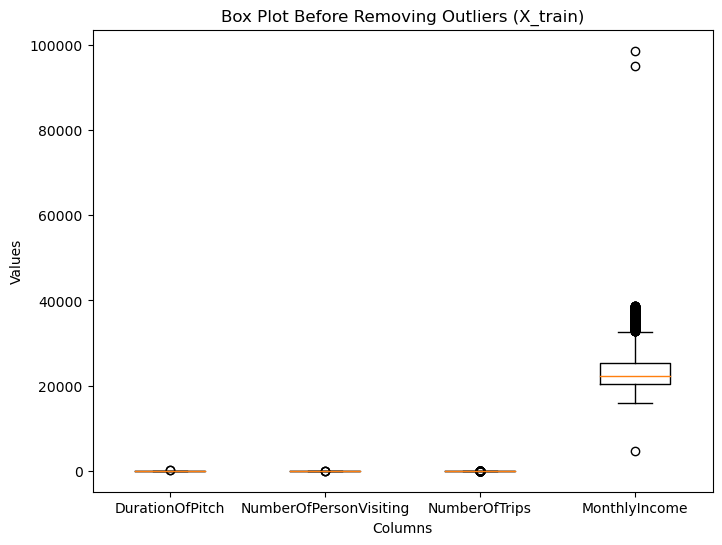

In [59]:
# Specify the column(s) for visualization
columns = ['DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfTrips', 'MonthlyIncome']

# Create a box plot for X_train
plt.figure(figsize=(8, 6))
plt.boxplot(X_train[columns], labels=columns, showfliers=True)
plt.title('Box Plot Before Removing Outliers (X_train)')
plt.xlabel('Columns')
plt.ylabel('Values')

In [60]:
# Calculate IQR and bounds for outlier detection on X_train
Q1 = X_train[columns].quantile(0.25)
Q3 = X_train[columns].quantile(0.85) #naikin jadi 0.85
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from X_train
outlier_mask = np.logical_xor(X_train[columns] < lower_bound, X_train[columns] > upper_bound).any(axis=1)
X_train_no_outliers = X_train.loc[~outlier_mask]

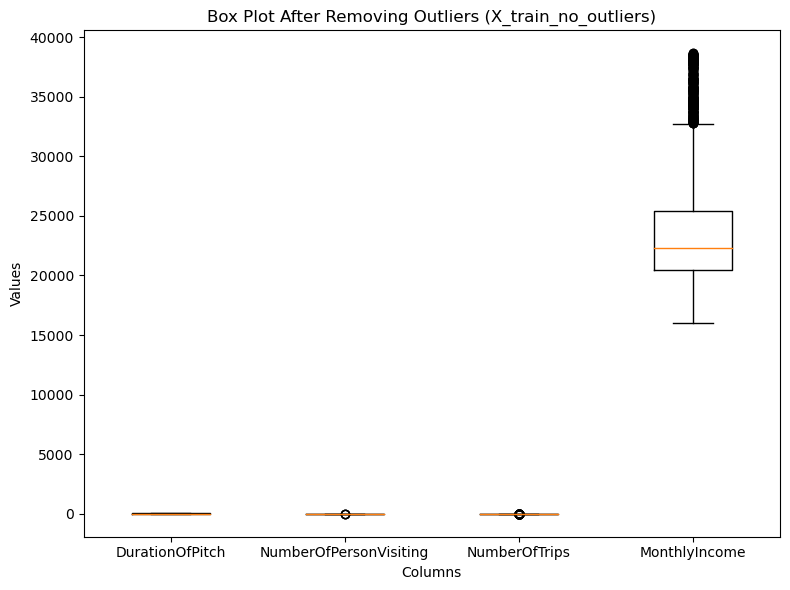

In [61]:
plt.figure(figsize=(8, 6))
plt.boxplot(X_train_no_outliers[columns], labels=columns, showfliers=True)
plt.title('Box Plot After Removing Outliers (X_train_no_outliers)')
plt.xlabel('Columns')
plt.ylabel('Values')

plt.tight_layout()
plt.show()

In [62]:
print('Train', X_train_no_outliers.shape)

Train (3789, 19)


In [63]:
print('Train', y_train.shape)

Train (3797,)


In [64]:
# Menyamakan baris-baris antara X_train_no_outliers dan y_train
y_train_no_outliers = y_train[X_train_no_outliers.index]

print(X_train_no_outliers.shape)  # Cek dimensi X_train_no_outliers
print(y_train_no_outliers.shape)  # Cek dimensi y_train_no_outliers

(3789, 19)
(3789,)


In [65]:
X_train = X_train_no_outliers.copy()

In [66]:
y_train = y_train_no_outliers.copy()

## Feature Transformation

In [67]:
X_train.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,AgeGroup
711,29.0,Self Enquiry,1,16.0,Salaried,Female,3,4.0,Basic,5.0,Single,7.0,1,5,1,1.0,Executive,17404.0,Adults
2893,40.0,Company Invited,1,15.0,Salaried,Female,3,4.0,Basic,3.0,Single,3.0,0,2,0,1.0,Executive,22433.0,Adults
1752,29.0,Company Invited,3,13.0,Salaried,Male,2,3.0,Deluxe,3.0,Single,2.0,0,1,0,1.0,Manager,19554.0,Adults
3666,25.0,Self Enquiry,2,29.0,Salaried,Male,3,6.0,Basic,3.0,Married,3.0,0,1,0,2.0,Executive,20233.0,Adolescent
2603,35.0,Company Invited,3,9.0,Small Business,Female,4,4.0,Basic,3.0,Single,8.0,0,5,1,3.0,Executive,20909.0,Adults


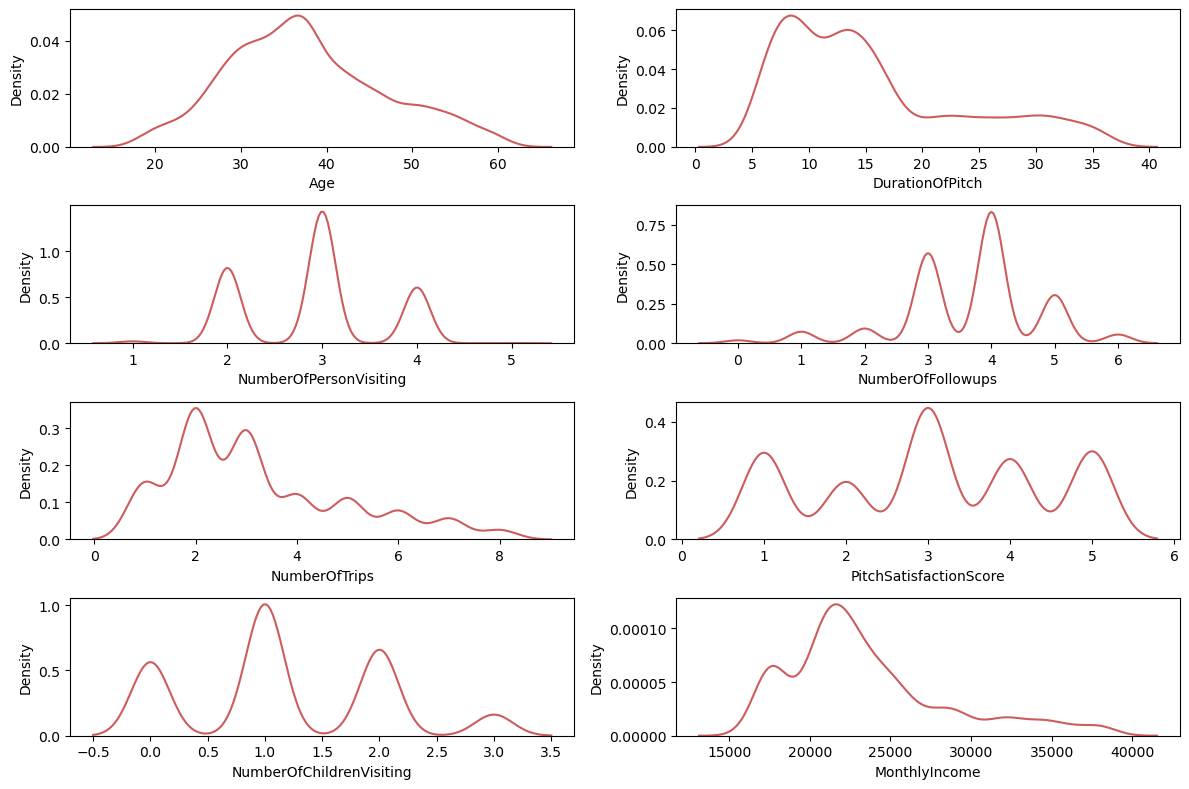

In [68]:
# distribution of data before scaling
plt.figure(figsize=(12, 8))
for i, col in enumerate(['Age', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups',
                         'NumberOfTrips', 'PitchSatisfactionScore', 'NumberOfChildrenVisiting',
                         'MonthlyIncome']):

    plt.subplot(4, 2, i+1)
    sns.kdeplot(x=X_train[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

In [69]:
columns = ['Age', 'NumberOfChildrenVisiting', 'PitchSatisfactionScore', 'NumberOfFollowups', 'NumberOfPersonVisiting',
           'DurationOfPitch', 'MonthlyIncome', 'NumberOfTrips']

In [70]:
# scaling using MinMaxScaler
scaler = MinMaxScaler() #inisialisasi
scaler.fit(X_train[columns])
X_train[columns] = scaler.transform(X_train[columns])
X_test[columns] = scaler.transform(X_test[columns])

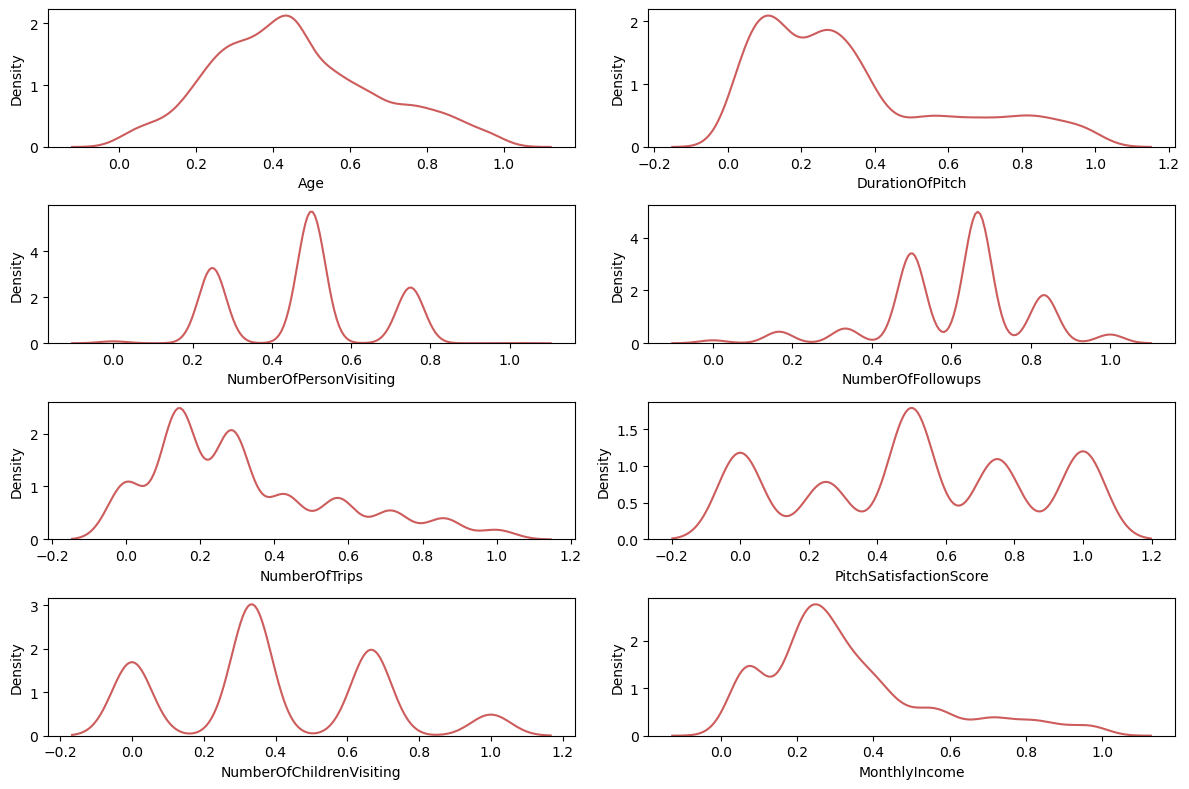

In [71]:
# distribution of data after scaling
plt.figure(figsize=(12, 8))
for i, col in enumerate(['Age', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups',
                         'NumberOfTrips', 'PitchSatisfactionScore', 'NumberOfChildrenVisiting',
                         'MonthlyIncome']):
    plt.subplot(4, 2, i+1)
    sns.kdeplot(x=X_train[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

In [72]:
# Melihat jumlah data dalam train set dan test set
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (3789, 19) (3789,)
Test (950, 19) (950,)


In [73]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3789 entries, 711 to 3563
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       3789 non-null   float64
 1   TypeofContact             3789 non-null   object 
 2   CityTier                  3789 non-null   int64  
 3   DurationOfPitch           3789 non-null   float64
 4   Occupation                3789 non-null   object 
 5   Gender                    3789 non-null   object 
 6   NumberOfPersonVisiting    3789 non-null   float64
 7   NumberOfFollowups         3789 non-null   float64
 8   ProductPitched            3789 non-null   object 
 9   PreferredPropertyStar     3789 non-null   float64
 10  MaritalStatus             3789 non-null   object 
 11  NumberOfTrips             3789 non-null   float64
 12  Passport                  3789 non-null   int64  
 13  PitchSatisfactionScore    3789 non-null   float64
 14  OwnCar

## Feature Extraction

In [74]:
X_train.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,AgeGroup
711,0.255814,Self Enquiry,1,0.354839,Salaried,Female,0.50,0.666667,Basic,5.0,Single,0.857143,1,1.00,1,0.333333,Executive,0.061611,Adults
2893,0.511628,Company Invited,1,0.322581,Salaried,Female,0.50,0.666667,Basic,3.0,Single,0.285714,0,0.25,0,0.333333,Executive,0.283721,Adults
1752,0.255814,Company Invited,3,0.258065,Salaried,Male,0.25,0.500000,Deluxe,3.0,Single,0.142857,0,0.00,0,0.333333,Manager,0.156567,Adults
3666,0.162791,Self Enquiry,2,0.774194,Salaried,Male,0.50,1.000000,Basic,3.0,Married,0.285714,0,0.00,0,0.666667,Executive,0.186556,Adolescent
2603,0.395349,Company Invited,3,0.129032,Small Business,Female,0.75,0.666667,Basic,3.0,Single,1.000000,0,1.00,1,1.000000,Executive,0.216412,Adults


In [75]:
X_train_corr = X_train.corr().iloc[1:,1:]
X_train_corr = X_train_corr.apply(lambda x: round(x, 3))
X_traincorr = []
for idx in X_train_corr.index:
    for col in X_train_corr.columns:
        X_traincorr.append([idx, col])
        if (np.abs(X_train_corr.loc[idx, col]) > 0.5) and (idx != col) and [col, idx] not in X_traincorr:
            print(f'{idx} with {col} has correlation : {X_train_corr.loc[idx, col]}')

NumberOfPersonVisiting with NumberOfChildrenVisiting has correlation : 0.591


In [76]:
# Menambahkan kolom baru untuk fitur di data train dan data test
X_train['TotalVisiting'] = X_train['NumberOfPersonVisiting'] + X_train['NumberOfChildrenVisiting']
X_test['TotalVisiting'] = X_test['NumberOfPersonVisiting'] + X_test['NumberOfChildrenVisiting']

# Menghapus kolom 'NumberOfPersonVisiting' dan 'NumberOfChildrenVisiting' dari data train dan data test
X_train.drop(columns=['NumberOfPersonVisiting', 'NumberOfChildrenVisiting'], axis=1, inplace=True)
X_test.drop(columns=['NumberOfPersonVisiting', 'NumberOfChildrenVisiting'], axis=1, inplace=True)

In [77]:
# Melihat jumlah data dalam train set dan test set
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (3789, 18) (3789,)
Test (950, 18) (950,)


## Feature Encoding

In [78]:
# Menampilkan ukuran dimensi data sebelum encoding di data train dan data test
print(f'Dimensi data train sebelum encoding adalah {X_train.shape[0]} baris dan {X_train.shape[1]} kolom')
print(f'Dimensi data test sebelum encoding adalah {X_test.shape[0]} baris dan {X_test.shape[1]} kolom')

# Label encoding data train dan data test
X_train['Gender'] = X_train['Gender'].map({'Female': 0, 'Male': 1})
X_train['ProductPitched'] = X_train['ProductPitched'].map({'Basic': 0, 'Deluxe': 1, 'Super Deluxe': 2, 'King': 3})
X_train['Designation'] = X_train['Designation'].map({'Manager': 0, 'Senior Manager': 1, 'Executive': 2, 'AVP': 3, 'VP': 4})

X_test['Gender'] = X_test['Gender'].map({'Female': 0, 'Male': 1})
X_test['ProductPitched'] = X_test['ProductPitched'].map({'Basic': 0, 'Deluxe': 1, 'Super Deluxe': 2, 'King': 3})
X_test['Designation'] = X_test['Designation'].map({'Manager': 0, 'Senior Manager': 1, 'Executive': 2, 'AVP': 3, 'VP': 4})

# One-hot encoding data train dan data test
for col in ['TypeofContact', 'Occupation', 'MaritalStatus']:
    onehots = pd.get_dummies(X_train[col], prefix=col)
    X_train = pd.concat([X_train, onehots], axis=1)
    X_train.drop(columns=col, axis=1, inplace=True)

for col in ['TypeofContact', 'Occupation', 'MaritalStatus']:
    onehots = pd.get_dummies(X_test[col], prefix=col)
    X_test = pd.concat([X_test, onehots], axis=1)
    X_test.drop(columns=col, axis=1, inplace=True)


# Menampilkan ukuran dimensi data setelah encoding di data train dan data test
print(f'Dimensi data train setelah encoding adalah {X_train.shape[0]} baris dan {X_train.shape[1]} kolom')
print(f'Dimensi data test setelah encoding adalah {X_test.shape[0]} baris dan {X_test.shape[1]} kolom')

Dimensi data train sebelum encoding adalah 3789 baris dan 18 kolom
Dimensi data test sebelum encoding adalah 950 baris dan 18 kolom
Dimensi data train setelah encoding adalah 3789 baris dan 22 kolom
Dimensi data test setelah encoding adalah 950 baris dan 22 kolom


In [79]:
# Melihat jumlah data dalam train set dan test set
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (3789, 22) (3789,)
Test (950, 22) (950,)


## Feature selection


In [80]:
X_train.head()

,Age,CityTier,DurationOfPitch,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,...,MonthlyIncome,AgeGroup,TotalVisiting,TypeofContact_Company Invited,TypeofContact_Self Enquiry,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,MaritalStatus_Married,MaritalStatus_Single
711,0.255814,1,0.354839,0,0.666667,0,5.0,0.857143,1,1.00,...,0.061611,Adults,0.833333,0,1,0,1,0,0,1
2893,0.511628,1,0.322581,0,0.666667,0,3.0,0.285714,0,0.25,...,0.283721,Adults,0.833333,1,0,0,1,0,0,1
1752,0.255814,3,0.258065,1,0.500000,1,3.0,0.142857,0,0.00,...,0.156567,Adults,0.583333,1,0,0,1,0,0,1
3666,0.162791,2,0.774194,1,1.000000,0,3.0,0.285714,0,0.00,...,0.186556,Adolescent,1.166667,0,1,0,1,0,1,0
2603,0.395349,3,0.129032,0,0.666667,0,3.0,1.000000,0,1.00,...,0.216412,Adults,1.750000,1,0,0,0,1,0,1


In [81]:
X_train.columns.tolist()

['Age',
 'CityTier',
 'DurationOfPitch',
 'Gender',
 'NumberOfFollowups',
 'ProductPitched',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'Passport',
 'PitchSatisfactionScore',
 'OwnCar',
 'Designation',
 'MonthlyIncome',
 'AgeGroup',
 'TotalVisiting',
 'TypeofContact_Company Invited',
 'TypeofContact_Self Enquiry',
 'Occupation_Large Business',
 'Occupation_Salaried',
 'Occupation_Small Business',
 'MaritalStatus_Married',
 'MaritalStatus_Single']

In [82]:
# Membuat kolom baru 'Is Married'
X_train['Is Married'] = X_train['MaritalStatus_Married']
X_test['Is Married'] = X_test['MaritalStatus_Married']

In [83]:
# Menghapus kolom 'AgeGroup', 'MaritalStatus_Married', 'MaritalStatus_Single'
columns_to_drop = ['AgeGroup', 'MaritalStatus_Married', 'MaritalStatus_Single']

X_train = X_train.drop(columns_to_drop, axis=1)
X_test = X_test.drop(columns_to_drop, axis=1)

In [84]:
X_train.columns.tolist()

['Age',
 'CityTier',
 'DurationOfPitch',
 'Gender',
 'NumberOfFollowups',
 'ProductPitched',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'Passport',
 'PitchSatisfactionScore',
 'OwnCar',
 'Designation',
 'MonthlyIncome',
 'TotalVisiting',
 'TypeofContact_Company Invited',
 'TypeofContact_Self Enquiry',
 'Occupation_Large Business',
 'Occupation_Salaried',
 'Occupation_Small Business',
 'Is Married']

In [85]:
X_train.head()

,Age,CityTier,DurationOfPitch,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting,TypeofContact_Company Invited,TypeofContact_Self Enquiry,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,Is Married
711,0.255814,1,0.354839,0,0.666667,0,5.0,0.857143,1,1.00,1,2,0.061611,0.833333,0,1,0,1,0,0
2893,0.511628,1,0.322581,0,0.666667,0,3.0,0.285714,0,0.25,0,2,0.283721,0.833333,1,0,0,1,0,0
1752,0.255814,3,0.258065,1,0.500000,1,3.0,0.142857,0,0.00,0,0,0.156567,0.583333,1,0,0,1,0,0
3666,0.162791,2,0.774194,1,1.000000,0,3.0,0.285714,0,0.00,0,2,0.186556,1.166667,0,1,0,1,0,1
2603,0.395349,3,0.129032,0,0.666667,0,3.0,1.000000,0,1.00,1,2,0.216412,1.750000,1,0,0,0,1,0


In [86]:
numericals = ['Age', 'DurationOfPitch', 'NumberOfFollowups', 'NumberOfTrips',
               'PitchSatisfactionScore', 'MonthlyIncome', 'TotalVisiting']

In [87]:
bestfeatures_num = SelectKBest(score_func=chi2, k=3)
fit_num = bestfeatures_num.fit(X_train[numericals], y_train)
dfscores_num = pd.DataFrame(fit_num.scores_)
dfcolumns_num = pd.DataFrame(X_train[numericals].columns)
#concat two dataframes for better visualization
featureScores_num = pd.concat([dfcolumns_num,dfscores_num],axis=1)
featureScores_num.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores_num.nlargest(len(X_train[numericals].columns),'Score'))  #print best features
featureScores_num.nlargest(len(X_train[numericals].columns),'Score').to_csv("numerical.csv")

                    Specs      Score
5           MonthlyIncome  10.035442
0                     Age   8.391431
1         DurationOfPitch   4.167694
2       NumberOfFollowups   2.412024
4  PitchSatisfactionScore   1.505252
3           NumberOfTrips   0.595245
6           TotalVisiting   0.039696


In [88]:
selected_cat_cols = ['MonthlyIncome', 'Age', 'DurationOfPitch', 'NumberOfFollowups', 'PitchSatisfactionScore']

In [89]:
categoricals = ['CityTier', 'Gender', 'ProductPitched', 'PreferredPropertyStar', 'Passport', 'OwnCar', 'Designation',
                'TypeofContact_Company Invited', 'TypeofContact_Self Enquiry', 'Occupation_Large Business', 'Occupation_Salaried',
                'Occupation_Small Business', 'Is Married']

In [90]:
bestfeatures_cat = SelectKBest(score_func=chi2, k=3)
fit_cat = bestfeatures_cat.fit(X_train[categoricals],y_train)
dfscores_cat = pd.DataFrame(fit_cat.scores_)
dfcolumns_cat = pd.DataFrame(X_train[categoricals].columns)
#concat two dataframes for better visualization
featureScores_cat = pd.concat([dfcolumns_cat,dfscores_cat],axis=1)
featureScores_cat.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores_cat.nlargest(len(X_train[categoricals].columns),'Score'))  #print best features
featureScores_cat.nlargest(len(X_train[categoricals].columns),'Score').to_csv("categorical.csv")

                            Specs       Score
4                        Passport  205.242964
2                  ProductPitched  129.278234
12                     Is Married   26.847332
6                     Designation   21.278250
0                        CityTier   20.412154
9       Occupation_Large Business   19.393862
3           PreferredPropertyStar    5.819882
7   TypeofContact_Company Invited    4.973610
10            Occupation_Salaried    3.873595
8      TypeofContact_Self Enquiry    2.018972
1                          Gender    0.833140
5                          OwnCar    0.523884
11      Occupation_Small Business    0.001621


In [91]:
selected_num_cols = ['Passport', 'ProductPitched', 'Is Married', 'Designation', 'CityTier',
                     'Occupation_Large Business']

In [92]:
selected_cols = selected_cat_cols + selected_num_cols

In [93]:
X_trainf = X_train[selected_cols].copy()
X_testf = X_test[selected_cols].copy()

In [94]:
# Melihat jumlah data dalam train set dan test set
print('Train', X_trainf.shape, y_train.shape)
print('Test', X_testf.shape, y_test.shape)

Train (3789, 11) (3789,)
Test (950, 11) (950,)


In [95]:
X_train = X_trainf.copy()
X_test = X_testf.copy()

In [96]:
X_train.columns.tolist()

['MonthlyIncome',
 'Age',
 'DurationOfPitch',
 'NumberOfFollowups',
 'PitchSatisfactionScore',
 'Passport',
 'ProductPitched',
 'Is Married',
 'Designation',
 'CityTier',
 'Occupation_Large Business']

In [97]:
X_test.columns.tolist()

['MonthlyIncome',
 'Age',
 'DurationOfPitch',
 'NumberOfFollowups',
 'PitchSatisfactionScore',
 'Passport',
 'ProductPitched',
 'Is Married',
 'Designation',
 'CityTier',
 'Occupation_Large Business']

In [98]:
# Menggabungkan X_train dan y_train untuk handling class imbalance
merged_finpro = pd.merge(X_train, y_train, left_index=True, right_index=True)

merged_finpro.head()

,MonthlyIncome,Age,DurationOfPitch,NumberOfFollowups,PitchSatisfactionScore,Passport,ProductPitched,Is Married,Designation,CityTier,Occupation_Large Business,ProdTaken
711,0.061611,0.255814,0.354839,0.666667,1.00,1,0,0,2,1,0,1
2893,0.283721,0.511628,0.322581,0.666667,0.25,0,0,0,2,1,0,0
1752,0.156567,0.255814,0.258065,0.500000,0.00,0,1,0,0,3,0,0
3666,0.186556,0.162791,0.774194,1.000000,0.00,0,0,1,2,2,0,1
2603,0.216412,0.395349,0.129032,0.666667,1.00,0,0,0,2,3,0,0


## Handling Class Imbalance

In [99]:
X = merged_finpro.drop(['ProdTaken'], axis = 1)
y = merged_finpro['ProdTaken']

In [100]:
smote = SMOTE()

X_smote, y_smote = smote.fit_resample(X, y)

print(X_smote.shape, y_smote.shape)

pd.value_counts(y_smote)

(6150, 11) (6150,)


1    3075
0    3075
Name: ProdTaken, dtype: int64

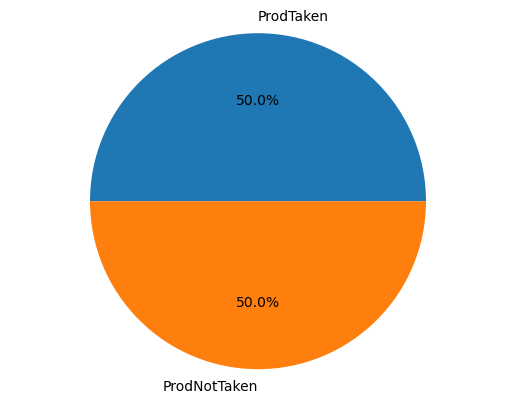

In [101]:
plt.pie(y_smote.value_counts(), labels=['ProdTaken', 'ProdNotTaken'], autopct='%0.1f%%')
plt.axis('equal')
plt.savefig('SMOTE')
plt.show()

# STAGE 3

## Data Modelling

In [102]:
def plotting_confusion_matrix(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(1, 1, figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', annot_kws={"fontsize":12}, ax=ax)

    # setting title and axis labels
    plt.tick_params(axis='both', which='major', labelsize=12)
    ax.set_xlabel('Predicted Labels', fontsize=12)
    ax.set_ylabel('True Labels', fontsize=12)
    ax.set_title('Confusion Matrix ' + title, fontsize=14)
    ax.xaxis.set_ticklabels(['Not Taken', 'Taken'])
    ax.yaxis.set_ticklabels(['Not Taken', 'Taken'])
    plt.show()

    print(f'Dari model {title} didapatkan bahwa:')
    print(f'- Jumlah TP (True Positive) = {cm[1][1]}')
    print(f'- Jumlah TN (True Negative) = {cm[0][0]}')
    print(f'- Jumlah FP (False Positive) = {cm[0][1]}')
    print(f'- Jumlah FN (False Negative) = {cm[1][0]}')

### Logistic Regression

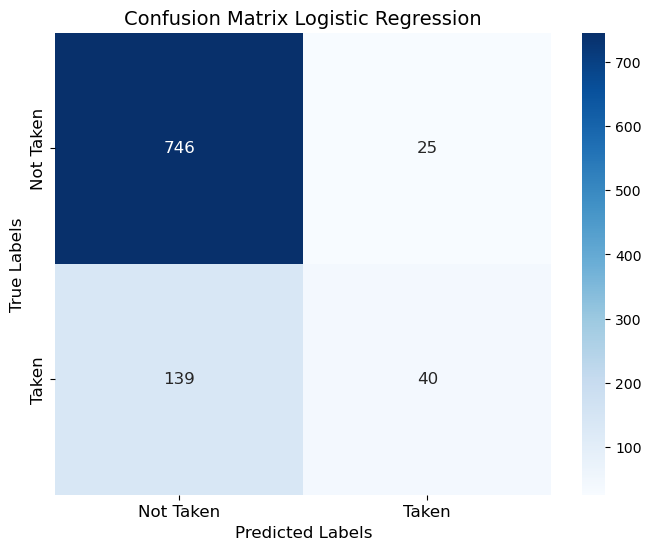

Dari model Logistic Regression didapatkan bahwa:
- Jumlah TP (True Positive) = 40
- Jumlah TN (True Negative) = 746
- Jumlah FP (False Positive) = 25
- Jumlah FN (False Negative) = 139


In [103]:
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train, y_train)

plotting_confusion_matrix(model_lr, X_test, y_test, title='Logistic Regression')

### Decision Tree

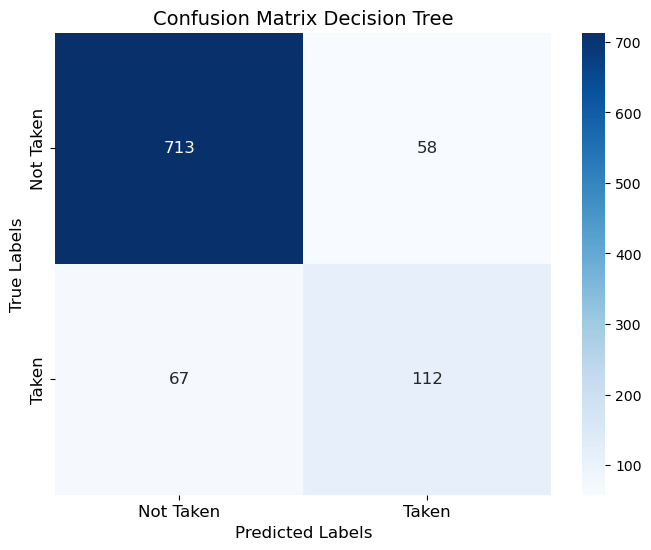

Dari model Decision Tree didapatkan bahwa:
- Jumlah TP (True Positive) = 112
- Jumlah TN (True Negative) = 713
- Jumlah FP (False Positive) = 58
- Jumlah FN (False Negative) = 67


In [104]:
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

plotting_confusion_matrix(model_dt, X_test, y_test, title='Decision Tree')

### Random Forest

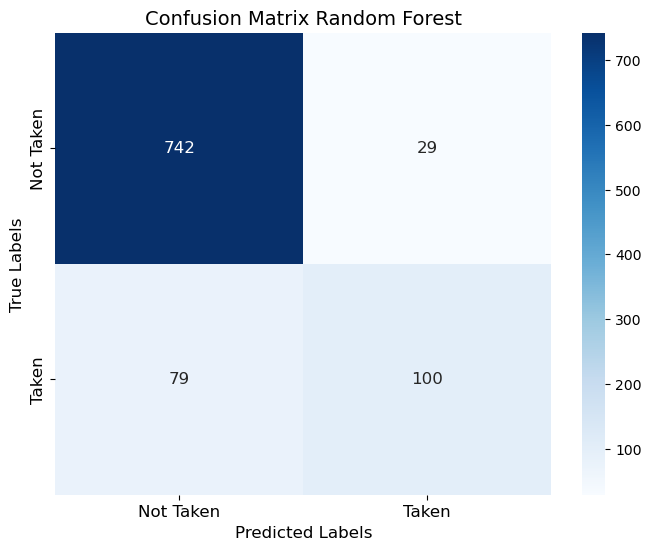

Dari model Random Forest didapatkan bahwa:
- Jumlah TP (True Positive) = 100
- Jumlah TN (True Negative) = 742
- Jumlah FP (False Positive) = 29
- Jumlah FN (False Negative) = 79


In [105]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

plotting_confusion_matrix(model_rf, X_test, y_test, title='Random Forest')

### AdaBoost

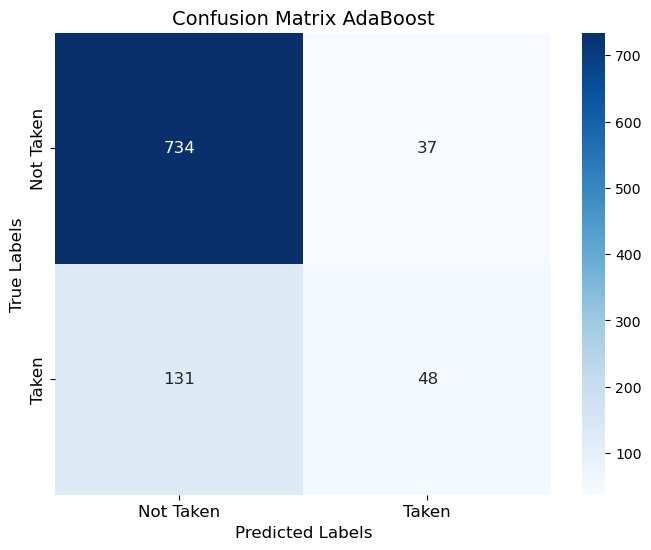

Dari model AdaBoost didapatkan bahwa:
- Jumlah TP (True Positive) = 48
- Jumlah TN (True Negative) = 734
- Jumlah FP (False Positive) = 37
- Jumlah FN (False Negative) = 131


In [106]:
model_adb = AdaBoostClassifier(random_state=42)
model_adb.fit(X_train, y_train)

plotting_confusion_matrix(model_adb, X_test, y_test, title='AdaBoost')

### XGBoost

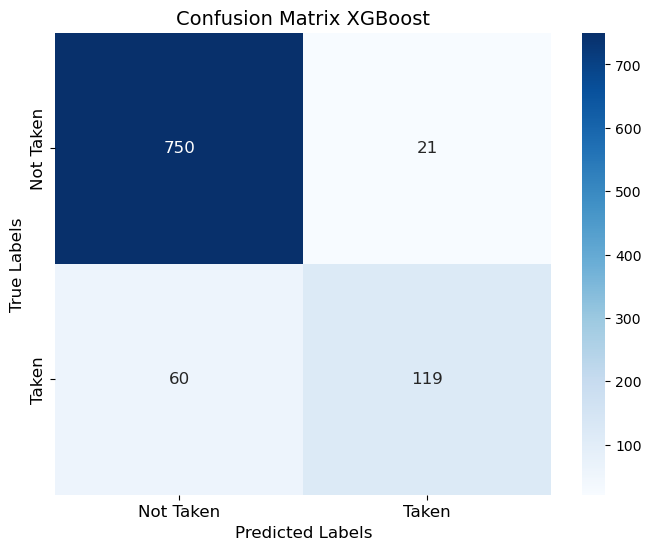

Dari model XGBoost didapatkan bahwa:
- Jumlah TP (True Positive) = 119
- Jumlah TN (True Negative) = 750
- Jumlah FP (False Positive) = 21
- Jumlah FN (False Negative) = 60


In [107]:
model_xgb = XGBClassifier(verbosity=0, random_state=42)
model_xgb.fit(X_train, y_train)

plotting_confusion_matrix(model_xgb, X_test, y_test, title='XGBoost')

## Model Evaluation

In [108]:
def eval_classification(model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    accuracy = round(accuracy_score(y_test, y_pred), 4)
    precision = round(precision_score(y_test, y_pred), 4)
    recall = round(recall_score(y_test, y_pred), 4)
    f1 = round(f1_score(y_test, y_pred), 4)
    mcc = round(matthews_corrcoef(y_test, y_pred), 4)
    auc_test = round(roc_auc_score(y_test, y_pred_proba[:, 1]), 4)
    auc_train = round(roc_auc_score(y_train, y_pred_proba_train[:, 1]), 4)

    return accuracy, precision, recall, f1, mcc, auc_test, auc_train

def score_all_classification(model_list, X_train, y_train, X_test, y_test):
    model_name = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'AdaBoost','XGBoost']
    eval_cols = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC', 'AUC (Test)', 'AUC (Train)']

    eval_list = []
    for name, model in zip(model_name, model_list):
        result = eval_classification(model, X_train, y_train, X_test, y_test)
        eval_list.append([name] + list(result))
    df_model = pd.DataFrame(data=eval_list, columns=eval_cols)

    return df_model

In [109]:
# scoring base model
model_list_base = [model_lr, model_dt, model_rf, model_adb, model_xgb]
score_all_classification(model_list_base, X_train, y_train, X_test, y_test)

,Model,Accuracy,Precision,Recall,F1 Score,MCC,AUC (Test),AUC (Train)
0,Logistic Regression,0.8274,0.6154,0.2235,0.3279,0.2959,0.7559,0.7959
1,Decision Tree,0.8684,0.6588,0.6257,0.6418,0.5616,0.7752,1.0000
2,Random Forest,0.8863,0.7752,0.5587,0.6494,0.5948,0.9102,1.0000
3,AdaBoost,0.8232,0.5647,0.2682,0.3636,0.3016,0.7763,0.8297
4,XGBoost,0.9147,0.8500,0.6648,0.7461,0.7034,0.9235,0.9993


## Tuning

In [110]:
list_hyperparameters = [
    { # Logistic Regression
        'penalty': ['l2','l1','elasticnet'],
        'C': [float(x) for x in np.logspace(-3, 3, 20)]
    },
    { # Decision Tree
        'max_depth' : [int(x) for x in np.linspace(10, 100, 10)],
        'min_samples_split' : [int(x) for x in np.linspace(2, 10, 5)],
        'min_samples_leaf' : [int(x) for x in np.linspace(1, 10, 5)],
        'max_features' : ['auto', 'sqrt']
    },
    { # Random Forest
        'n_estimators' : [int(x) for x in np.linspace(50, 1000, 50)],
        'max_features' : ['auto', 'sqrt', 'log2'],
        'max_depth' : [int(x) for x in np.linspace(10, 100, 10)],
        'criterion' : ['gini','entropy'],
        'min_samples_split' : [int(x) for x in np.linspace(2, 10, 5)],
        'min_samples_leaf' : [int(x) for x in np.linspace(1, 10, 5)],
        'class_weight' : ['balanced', 'balanced_subsample'],
        'oob_score' : [True, False]
    },
    { # Adaboost
       'n_estimators' : [int(x) for x in np.linspace(100, 2000, 1000)],
       'learning_rate' : [float(x) for x in np.linspace(0.001, 0.1, 100)],
       'algorithm' : ['SAMME', 'SAMME.R']
    },
    { # XGBoost
        'max_depth' : [int(x) for x in np.linspace(10, 100, 10)],
        'min_child_weight' : [int(x) for x in np.linspace(1, 10, 11)],
        'gamma' : [float(x) for x in np.linspace(0, 1, 11)],
        'tree_method' : ['auto', 'exact', 'approx', 'hist'],
        'colsample_bytree' : [float(x) for x in np.linspace(0, 1, 11)],
        'learning_rate' : [float(x) for x in np.linspace(0, 1, 100)],
        'reg_lambda' : [float(x) for x in np.linspace(0, 1, 11)],
        'reg_alpha' : [float(x) for x in np.linspace(0, 1, 11)]
    }
]

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.best_estimator_.get_params()[key])

### Logistic Regression

C:\Users\icha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\icha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\icha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\icha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is i

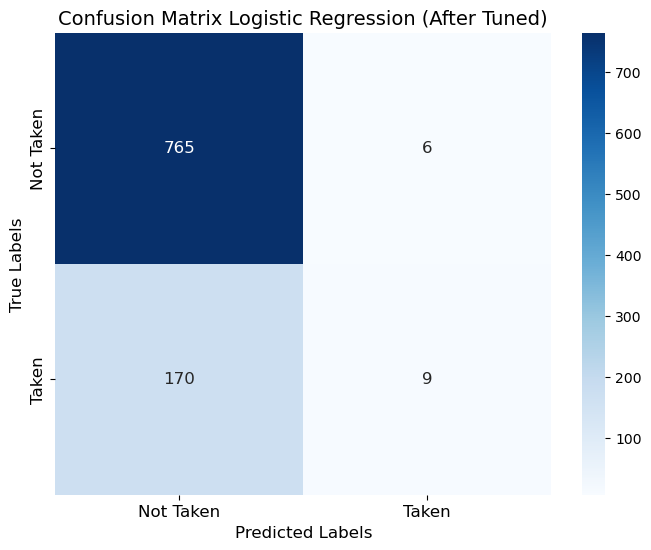

Dari model Logistic Regression (After Tuned) didapatkan bahwa:
- Jumlah TP (True Positive) = 9
- Jumlah TN (True Negative) = 765
- Jumlah FP (False Positive) = 6
- Jumlah FN (False Negative) = 170


In [111]:
model_lr = LogisticRegression(random_state=42)
tuned_lr = RandomizedSearchCV(model_lr, list_hyperparameters[0], cv=5, scoring='precision', random_state=42)
tuned_lr.fit(X_train, y_train)

plotting_confusion_matrix(tuned_lr, X_test, y_test, title='Logistic Regression (After Tuned)')

In [112]:
print('MODEL LOGISTIC REGRESSION AFTER HYPERPARAMETER TUNING')
print('=====================================================')
show_best_hyperparameter(tuned_lr, list_hyperparameters[0])
print('=====================================================')

MODEL LOGISTIC REGRESSION AFTER HYPERPARAMETER TUNING
Best penalty: l2
Best C: 0.018329807108324356


### Decision Tree

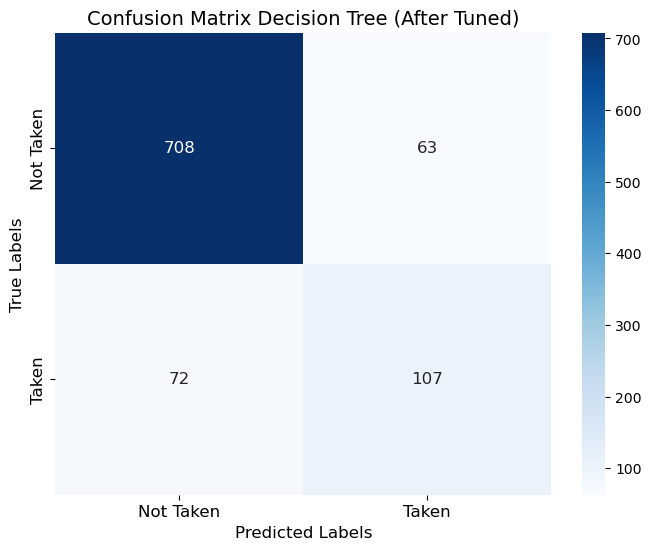

Dari model Decision Tree (After Tuned) didapatkan bahwa:
- Jumlah TP (True Positive) = 107
- Jumlah TN (True Negative) = 708
- Jumlah FP (False Positive) = 63
- Jumlah FN (False Negative) = 72


In [113]:
model_dt = DecisionTreeClassifier(random_state=42)
tuned_dt = RandomizedSearchCV(model_dt, list_hyperparameters[1], cv=5, scoring='precision', random_state=42)
tuned_dt.fit(X_train, y_train)

plotting_confusion_matrix(tuned_dt, X_test, y_test, title='Decision Tree (After Tuned)')

In [114]:
print('MODEL DECISION TREE AFTER HYPERPARAMETER TUNING')
print('===============================================')
show_best_hyperparameter(tuned_dt, list_hyperparameters[1])
print('===============================================')

MODEL DECISION TREE AFTER HYPERPARAMETER TUNING
Best max_depth: 100
Best min_samples_split: 2
Best min_samples_leaf: 1
Best max_features: auto


### Random Forest

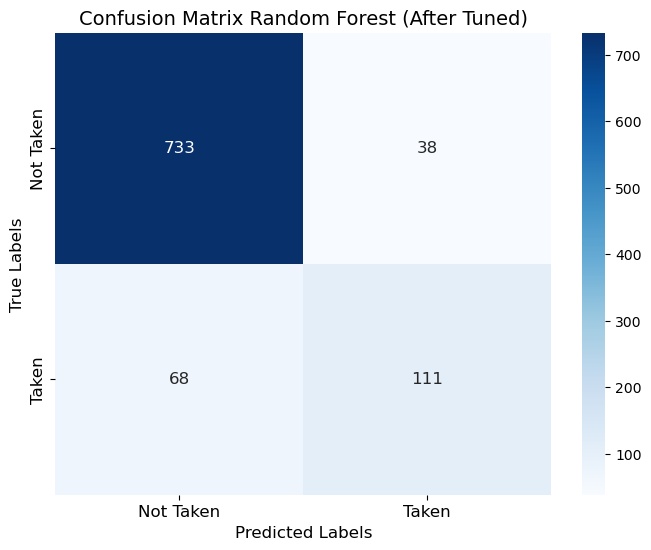

Dari model Random Forest (After Tuned) didapatkan bahwa:
- Jumlah TP (True Positive) = 111
- Jumlah TN (True Negative) = 733
- Jumlah FP (False Positive) = 38
- Jumlah FN (False Negative) = 68


In [115]:
model_rf = RandomForestClassifier(random_state=42)
tuned_rf = RandomizedSearchCV(model_rf, list_hyperparameters[2], cv=5, scoring='precision', random_state=42)
tuned_rf.fit(X_train, y_train)

plotting_confusion_matrix(tuned_rf, X_test, y_test, title='Random Forest (After Tuned)')

In [116]:
print('MODEL RANDOM FOREST AFTER HYPERPARAMETER TUNING')
print('===============================================')
show_best_hyperparameter(tuned_rf, list_hyperparameters[2])
print('===============================================')

MODEL RANDOM FOREST AFTER HYPERPARAMETER TUNING
Best n_estimators: 709
Best max_features: log2
Best max_depth: 50
Best criterion: entropy
Best min_samples_split: 6
Best min_samples_leaf: 1
Best class_weight: balanced
Best oob_score: True


### AdaBoost

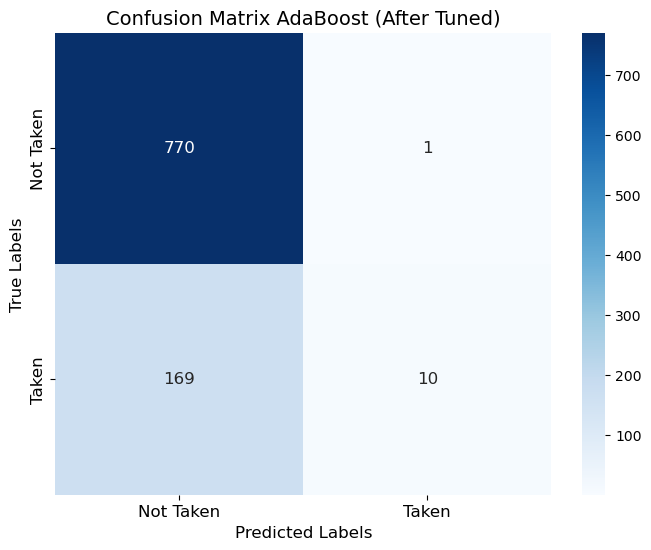

Dari model AdaBoost (After Tuned) didapatkan bahwa:
- Jumlah TP (True Positive) = 10
- Jumlah TN (True Negative) = 770
- Jumlah FP (False Positive) = 1
- Jumlah FN (False Negative) = 169


In [117]:
model_adb = AdaBoostClassifier(random_state=42)
tuned_adb = RandomizedSearchCV(model_adb, list_hyperparameters[3], cv=5, scoring='precision', random_state=42)
tuned_adb.fit(X_train, y_train)

plotting_confusion_matrix(tuned_adb, X_test, y_test, title='AdaBoost (After Tuned)')

In [118]:
print('MODEL ADABOOST AFTER HYPERPARAMETER TUNING')
print('==========================================')
show_best_hyperparameter(tuned_adb, list_hyperparameters[3])
print('==========================================')

MODEL ADABOOST AFTER HYPERPARAMETER TUNING
Best n_estimators: 1419
Best learning_rate: 0.004
Best algorithm: SAMME.R


### XGBoost

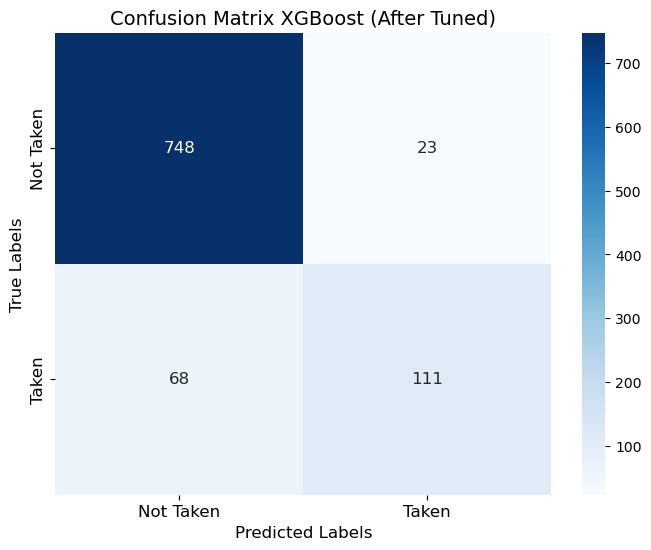

Dari model XGBoost (After Tuned) didapatkan bahwa:
- Jumlah TP (True Positive) = 111
- Jumlah TN (True Negative) = 748
- Jumlah FP (False Positive) = 23
- Jumlah FN (False Negative) = 68


In [119]:
model_xgb = XGBClassifier(random_state=42, verbosity=0)
tuned_xgb = RandomizedSearchCV(model_xgb, list_hyperparameters[-1], cv=5, scoring='precision', random_state=42)
tuned_xgb.fit(X_train, y_train)

plotting_confusion_matrix(tuned_xgb, X_test, y_test, title='XGBoost (After Tuned)')

In [120]:
print('MODEL XGBOOST AFTER HYPERPARAMETER TUNING')
print('=========================================')
show_best_hyperparameter(tuned_xgb, list_hyperparameters[-1])
print('=========================================')

MODEL XGBOOST AFTER HYPERPARAMETER TUNING
Best max_depth: 100
Best min_child_weight: 2
Best gamma: 0.1
Best tree_method: auto
Best colsample_bytree: 0.6000000000000001
Best learning_rate: 0.5252525252525253
Best reg_lambda: 0.8
Best reg_alpha: 0.8


In [121]:
# base model
score_all_classification(model_list_base, X_train, y_train, X_test, y_test)

,Model,Accuracy,Precision,Recall,F1 Score,MCC,AUC (Test),AUC (Train)
0,Logistic Regression,0.8274,0.6154,0.2235,0.3279,0.2959,0.7559,0.7959
1,Decision Tree,0.8684,0.6588,0.6257,0.6418,0.5616,0.7752,1.0000
2,Random Forest,0.8863,0.7752,0.5587,0.6494,0.5948,0.9102,1.0000
3,AdaBoost,0.8232,0.5647,0.2682,0.3636,0.3016,0.7763,0.8297
4,XGBoost,0.9147,0.8500,0.6648,0.7461,0.7034,0.9235,0.9993


In [122]:
# tuned model
model_list_tuned = [tuned_lr, tuned_dt, tuned_rf, tuned_adb, tuned_xgb]
score_all_classification(model_list_tuned, X_train, y_train, X_test, y_test)

,Model,Accuracy,Precision,Recall,F1 Score,MCC,AUC (Test),AUC (Train)
0,Logistic Regression,0.8147,0.6000,0.0503,0.0928,0.1333,0.7564,0.7907
1,Decision Tree,0.8579,0.6294,0.5978,0.6132,0.5265,0.7580,1.0000
2,Random Forest,0.8884,0.7450,0.6201,0.6768,0.6138,0.9086,0.9995
3,AdaBoost,0.8211,0.9091,0.0559,0.1053,0.1995,0.7487,0.7863
4,XGBoost,0.9042,0.8284,0.6201,0.7093,0.6632,0.9171,1.0000


In [123]:
#Check Overfitting and Underfitting tuned model
def checkoverfit(model,x_train,x_test,title):
    cek = pd.DataFrame({
        'Model': title,
        'accuracy_score_train':[accuracy_score(y_train,model.predict(x_train))],
        'accuracy_score_test' :[accuracy_score(y_test,model.predict(x_test))],
        'accuracy_score_cv' : [model.best_score_]
        })
    return cek
checkoverfit(tuned_xgb,X_train,X_test,'XGBoost Classifier')

,Model,accuracy_score_train,accuracy_score_test,accuracy_score_cv
0,XGBoost Classifier,0.998944,0.904211,0.769496


In [124]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [125]:
#Check Overfitting and Underfitting base line model
def checkoverfit(model,x_train,x_test,title):
    cek = pd.DataFrame({
        'Model': title,
        'accuracy_score_train':[accuracy_score(y_train,model.predict(x_train))],
        'accuracy_score_test' :[accuracy_score(y_test,model.predict(x_test))],
        })
    return cek
checkoverfit(model_xgb,X_train,X_test,'XGBoost Classifier')

,Model,accuracy_score_train,accuracy_score_test
0,XGBoost Classifier,0.993402,0.914737


# STAGE 4

## Feature Importance

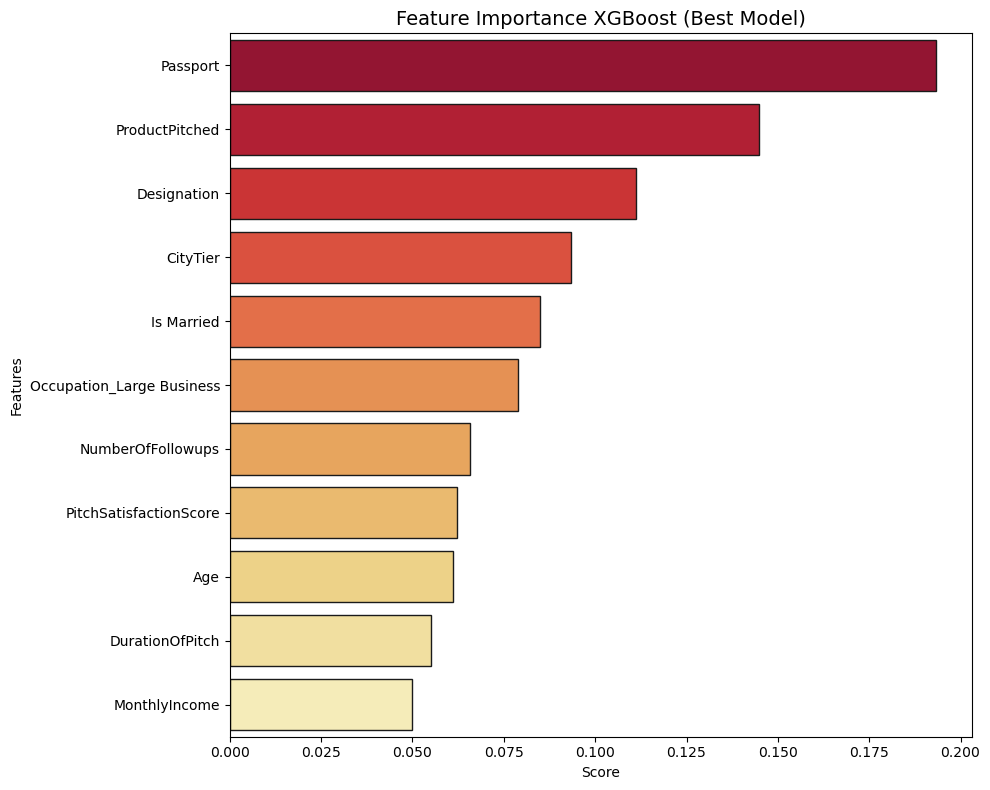

In [126]:
# feature importance using best model
feature_importance_rf = pd.Series(model_xgb.feature_importances_, index=X_train.columns)
df_feature = feature_importance_rf.sort_values(ascending=False).to_frame(name='Score').reset_index()

plt.figure(figsize=(10,8))
sns.barplot(data=df_feature, y='index', x='Score', palette='YlOrRd_r', edgecolor='.1')
plt.xlabel('Score')
plt.ylabel('Features')
plt.title('Feature Importance XGBoost (Best Model)', fontsize=14)
plt.tight_layout()
plt.show()

In [127]:
# combine prediction labels into test data
df_final_test = X_test.copy()
best_model = model_xgb
df_final_test['ProdTaken'] = y_test
df_final_test['ProdTaken_Pred'] = best_model.predict(X_test)
df_final_test['ProdTaken_PredProba'] = best_model.predict_proba(X_test)[:,1]
df_final_test.head()

,MonthlyIncome,Age,DurationOfPitch,NumberOfFollowups,PitchSatisfactionScore,Passport,ProductPitched,Is Married,Designation,CityTier,Occupation_Large Business,ProdTaken,ProdTaken_Pred,ProdTaken_PredProba
900,0.118497,0.456332,0.129032,0.500000,0.50,0,0,0,2,1,1,0,0,0.313052
3259,0.209301,0.093023,0.064516,0.833333,1.00,1,0,0,2,1,1,0,0,0.333573
764,0.001899,0.232558,0.354839,0.500000,1.00,0,0,0,2,3,0,0,0,0.393669
2715,0.641198,0.697674,1.000000,0.666667,0.50,1,0,0,1,1,0,1,1,0.720987
477,0.759253,0.744186,0.129032,0.500000,0.25,0,3,0,4,2,0,0,0,0.000474


## Business Impact

### Conversion Rate

In [128]:
df_final_test.head()

,MonthlyIncome,Age,DurationOfPitch,NumberOfFollowups,PitchSatisfactionScore,Passport,ProductPitched,Is Married,Designation,CityTier,Occupation_Large Business,ProdTaken,ProdTaken_Pred,ProdTaken_PredProba
900,0.118497,0.456332,0.129032,0.500000,0.50,0,0,0,2,1,1,0,0,0.313052
3259,0.209301,0.093023,0.064516,0.833333,1.00,1,0,0,2,1,1,0,0,0.333573
764,0.001899,0.232558,0.354839,0.500000,1.00,0,0,0,2,3,0,0,0,0.393669
2715,0.641198,0.697674,1.000000,0.666667,0.50,1,0,0,1,1,0,1,1,0.720987
477,0.759253,0.744186,0.129032,0.500000,0.25,0,3,0,4,2,0,0,0,0.000474


In [129]:
# count number of total customer
total_customer_before = len(df_final_test['ProdTaken'])
total_customer_after = len(df_final_test[df_final_test['ProdTaken_Pred']==1])

# count number of targeted customer
targeted_customer_before = len(df_final_test[df_final_test['ProdTaken']==1])
targeted_customer_after = len(df_final_test[(df_final_test['ProdTaken']==1)
                                            & (df_final_test['ProdTaken_Pred']==1)])

# calculate conversion rate
cvr_before = round(targeted_customer_before/total_customer_before * 100, 1)
cvr_after = round(targeted_customer_after/total_customer_after * 100, 1)

In [130]:
# view conversion rate before and after using model
df_conversion = pd.DataFrame([[total_customer_before, total_customer_after],
                              [targeted_customer_before, targeted_customer_after],
                              [cvr_before, cvr_after]],
                             columns=['Before Using Model', 'After Using Model'],
                             index=['Total Customer', 'Targeted Customer', 'Conversion Rate'])
df_conversion

,Before Using Model,After Using Model
Total Customer,950.0,140.0
Targeted Customer,179.0,119.0
Conversion Rate,18.8,85.0


### Marketing Cost

In [131]:
# define cost in minutes
cost_per_minute = 3

# calculate marketing cost
duration_before = df_final_test['DurationOfPitch'].sum()
duration_after = df_final_test[df_final_test['ProdTaken_Pred']==1]['DurationOfPitch'].sum()
cost_before = duration_before * cost_per_minute
cost_after = duration_after * cost_per_minute
saving_cost = cost_before - cost_after
saving_cost_perc = round(saving_cost/cost_before * 100, 0)

In [132]:
df_cost = pd.DataFrame([[targeted_customer_before, targeted_customer_after], [cost_before, cost_before],
                        [cost_before, cost_after], [0, saving_cost], [0, saving_cost_perc]],
                       index=['Targeted Customer', 'All Cost', 'Spending Cost', 'Saving Cost', '% Saving Cost'],
                       columns=['Before Using Model', 'After Using Model'])
df_cost

,Before Using Model,After Using Model
Targeted Customer,179.000000,119.000000
All Cost,912.580645,912.580645
Spending Cost,912.580645,157.161290
Saving Cost,0.000000,755.419355
% Saving Cost,0.000000,83.000000


## Recommendation

### Gain and Lift Analysis

In [133]:
# df_estimate = pd.DataFrame({'ProdTaken_Proba':best_model.predict_proba(X_test)[:,1], 'ProdTaken': y_test})
# df_estimate = df_estimate.sort_values(by='ProdTaken_Proba', ascending=False)
# df_estimate['Decile'] = pd.qcut(df_estimate['ProdTaken_Proba'], 10, labels=[i for i in range (10, 0, -1)])
# df_estimate.head()

In [134]:
# # Calculate the actual product taken in each decile
# df_prodtaken = pd.crosstab(df_estimate['Decile'], df_estimate['ProdTaken'])[1].reset_index(name='Number of Responses')
# df_prodtaken['Number of Cases'] = df_estimate['Decile'].value_counts(sort=False).values
# df_prodtaken = df_prodtaken.sort_values(by='Decile', ascending=False).reset_index(drop=True)

# # Calculate the cumulative
# df_prodtaken['Cumulative Responses'] = df_prodtaken['Number of Responses'].cumsum()
# # Calculate the percentage of positive in each decile compared to the total responses
# df_prodtaken['% of Events'] = round((df_prodtaken['Number of Responses']/df_prodtaken['Number of Responses'].sum()*100),2)
# # Calculate the Gain in each decile
# df_prodtaken['Gain'] = df_prodtaken['% of Events'].cumsum()
# # Calculate lift for each decile
# df_prodtaken['Decile'] = df_prodtaken['Decile'].astype('int')
# df_prodtaken['Lift'] = round(df_prodtaken['Gain']/(df_prodtaken['Decile']*10), 2)
# df_prodtaken

### Shap Values

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


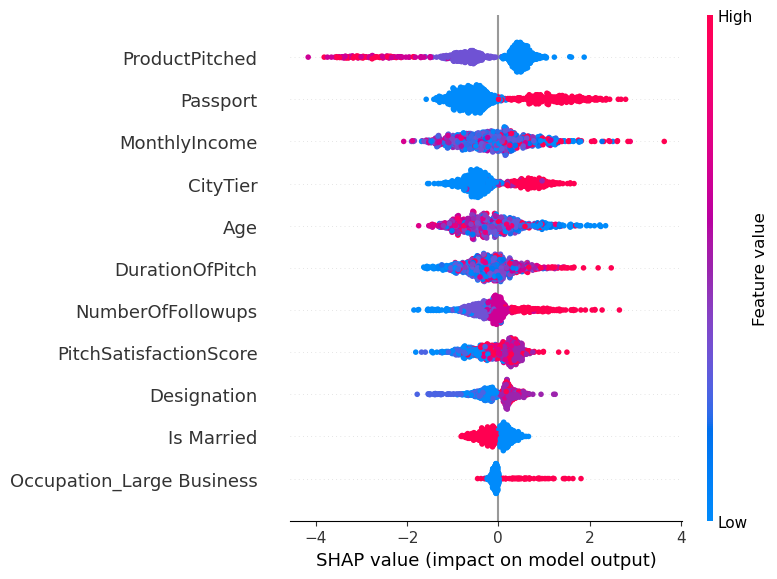

In [135]:
!pip install shap
import shap
from xgboost import DMatrix

explainer = shap.TreeExplainer(model_xgb)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

## Conclusion